In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',300)

In [2]:
app_df = pd.read_csv('credit_case_study_data/application_data.csv')
pre_app = pd.read_csv('credit_case_study_data/previous_application.csv')

# 1. Check data

In [3]:
app_df.shape

(307511, 122)

In [4]:
# check data type of columns
app_df.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
# check columns with Nan values
app_df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [6]:
# check the percentage of missing data in columns
(app_df.isnull().sum()/len(app_df)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [7]:
# drop columns that has less data than 50%
app_df = app_df.loc[:, (app_df.isnull().sum()/len(app_df)*100) < 50]
app_df.shape

(307511, 81)

In [8]:
round(app_df.isnull().sum()/len(app_df)*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [9]:
temp = app_df.columns[((app_df.isnull().sum()/len(app_df)*100) <= 40) & ((app_df.isnull().sum()/len(app_df)*100) > 0)]
len(temp)

18

In [10]:
temp

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [11]:
# Data cleansing and handling outliers
# AMT_ANNUITY is Loan annuity
app_df[app_df['AMT_ANNUITY'].isnull()].sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
239329      377174       0         Cash loans           F            N   
75873       187985       0         Cash loans           M            Y   
59934       169487       0         Cash loans           M            Y   
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
239329               Y             0          157500.0    792000.0   
75873                N             0          144000.0    219249.0   
59934                N             0          202500.0    360000.0   
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
239329          NaN         792000.0          Family         State servant   
75873           NaN         166500.0   Unaccompanied               Working   
59934           NaN         360000.0   Unaccompanied               Working   
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
239329  Secondary / secondary special               Married   
75873                Higher education  Single / not married   
59934   Secondary / secondary special  Single / not married   
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
239329  House / apartment                    0.026392      -17661   
75873    Rented apartment                    0.022800      -20831   
59934   House / apartment                    0.046220      -19762   
47531   House / apartment                    0.026392      -10668   
50035   House / apartment                    0.035792       -9027   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
239329          -2885            -8594.0            -1221           1   
75873           -2450             -771.0            -4203           1   
59934           -2498           -11285.0            -3305           1   
47531           -2523            -4946.0            -3238           1   
50035           -1270            -3640.0             -741           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
239329               1                0                 1           1   
75873                1                0                 1           0   
59934                1                1                 1           1   
47531                1                1                 1           1   
50035                1                1                 1           0   

        FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
239329           0               Managers              2.0   
75873            0                Drivers              1.0   
59934            0               Laborers              1.0   
47531            0  High skill tech staff              1.0   
50035            0               Laborers              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
239329                     2                            2   
75873                      2                            2   
59934                      1                            1   
47531                      2                            2   
50035                      2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
239329                   SATURDAY                       14   
75873                      FRIDAY                       15   
59934                      FRIDAY                       15   
47531        

In [12]:
app_df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

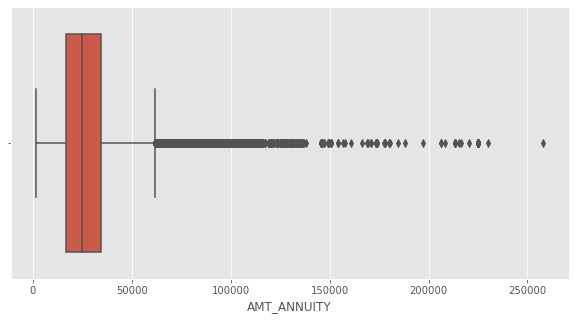

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(app_df['AMT_ANNUITY']);

In [14]:
# AMT_GOODS_PRICE is For consumer loans it is the price of the goods for which the loan is given
app_df[app_df['AMT_GOODS_PRICE'].isnull()].sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
230484      366971       0    Revolving loans           F            N   
236974      374479       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
246989      385808       0    Revolving loans           F            N   
278747      422928       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
230484               Y             1           90000.0    135000.0   
236974               N             1          225000.0    202500.0   
55600                Y             0           81000.0    202500.0   
246989               Y             0           67500.0    180000.0   
278747               Y             1          117000.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
230484       6750.0              NaN             NaN          Working   
236974      10125.0              NaN             NaN          Working   
55600       10125.0              NaN             NaN        Pensioner   
246989       9000.0              NaN             NaN          Working   
278747       9000.0              NaN             NaN          Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
230484               Higher education               Married   
236974  Secondary / secondary special             Separated   
55600   Secondary / secondary special               Married   
246989  Secondary / secondary special  Single / not married   
278747  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
230484  House / apartment                    0.010147      -12594   
236974       With parents                    0.020713      -12869   
55600   House / apartment                    0.009630      -22061   
246989  House / apartment                    0.025164       -8044   
278747  House / apartment                    0.009175      -12462   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
230484          -2357            -2894.0            -2723           1   
236974          -2118            -2960.0             -503           1   
55600          365243            -4961.0            -4393           1   
246989           -846             -545.0             -720           1   
278747          -1203            -3084.0            -1610           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
230484               1                1                 1           0   
236974               1                1                 1           1   
55600                0                0                 1           1   
246989               1                0                 1           1   
278747               1                0                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
230484           0     Sales staff              3.0                     2   
236974           0     Accountants              2.0                     3   
55600            0             NaN              2.0                     2   
246989           0        Laborers              1.0                     2   
278747           1        Laborers              3.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
230484                            2                   THURSDAY   
236974                            3                  WEDNESDAY   
55600                             2                    TUESDAY   
246989                            2                   THURSDAY   
278747                            2                   SATURDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
230484                       12                           0   
236974                       14              

In [15]:
round(app_df['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2)

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
10%       180000.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

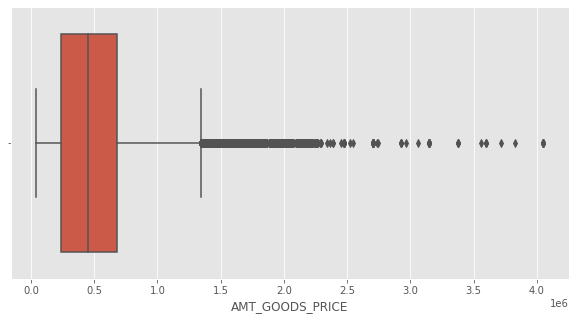

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(app_df['AMT_GOODS_PRICE']);

In [17]:
# NAME_TYPE_SUITE is Who was accompanying client when he was applying for the loan
app_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [18]:
app_df['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [19]:
# CNT_FAM_MEMBERS is How many family members does client have
app_df[app_df['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
41982            NaN                          NaN            NaN   
187348      0.670652                        0.997          0.375   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
41982                            NaN             NaN   
187348                         0.997           0.375   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
41982                            NaN             NaN             NaN   
187348                         0.997           0.375          0.0791   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
41982                  NaN                       3.0   
187348                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
41982                        0.0                       3.0   
187348                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
41982                        0.0                  -876.0                0   
187348                       0.0                  -654.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
41982                 0                0                1     

In [20]:
round(app_df['CNT_FAM_MEMBERS'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2)

count    307509.00
mean          2.15
std           0.91
min           1.00
10%           1.00
25%           2.00
50%           2.00
75%           3.00
99%           5.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64

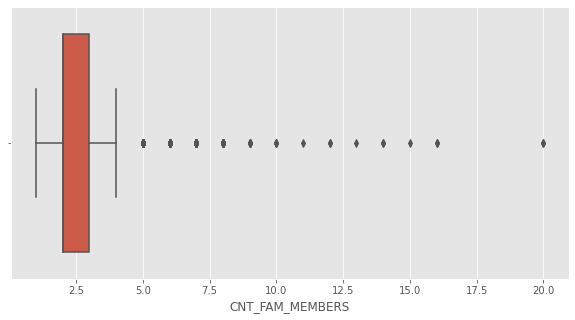

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(app_df['CNT_FAM_MEMBERS']);

In [22]:
# OCCUPATION_TYPE is What kind of occupation does the client have
app_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
app_df['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [24]:
app_df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

<AxesSubplot:xlabel='count', ylabel='OCCUPATION_TYPE'>

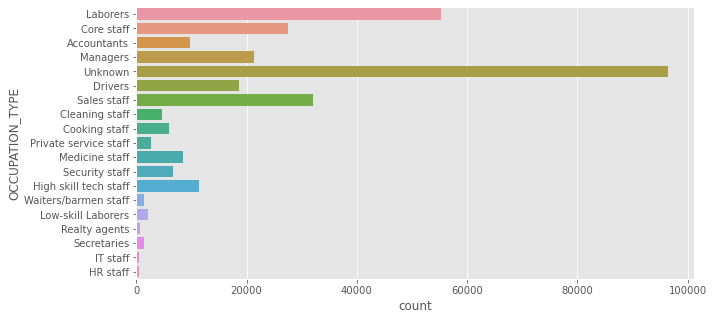

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data = app_df, y = 'OCCUPATION_TYPE')

In [26]:
# EXT_SOURCE_2 is Normalized score from external data source
round(app_df['EXT_SOURCE_2'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4)

count    306851.0000
mean          0.5144
std           0.1911
min           0.0000
10%           0.2157
25%           0.3925
50%           0.5660
75%           0.6636
99%           0.7828
max           0.8550
Name: EXT_SOURCE_2, dtype: float64

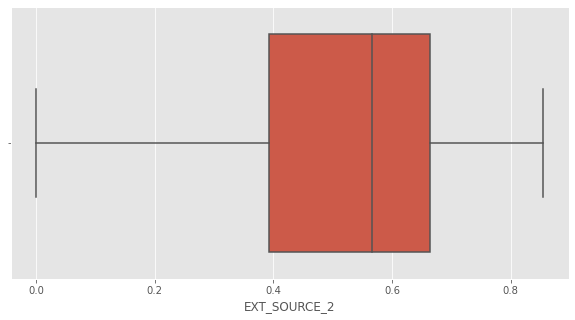

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(app_df['EXT_SOURCE_2']);

In [28]:
# AMT_CREDIT is Credit amount of the loan
round(app_df['AMT_CREDIT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2)

count     307511.00
mean      599026.00
std       402490.78
min        45000.00
10%       180000.00
25%       270000.00
50%       513531.00
75%       808650.00
99%      1854000.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT'>

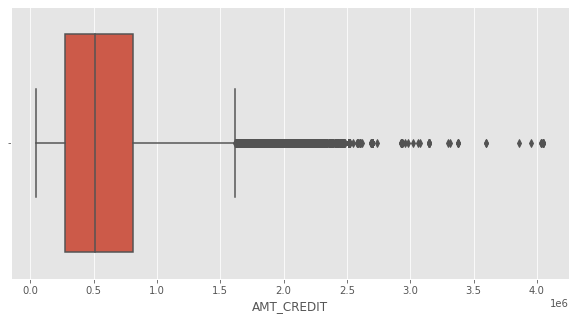

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(app_df['AMT_CREDIT'])

In [30]:
round(app_df['EXT_SOURCE_3'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4)

count    246546.0000
mean          0.5109
std           0.1948
min           0.0005
10%           0.2276
25%           0.3706
50%           0.5353
75%           0.6691
99%           0.8328
max           0.8960
Name: EXT_SOURCE_3, dtype: float64

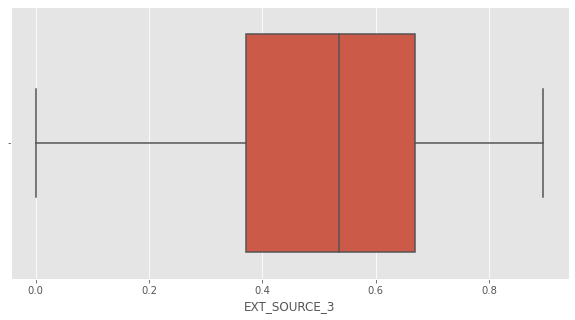

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(app_df['EXT_SOURCE_3']);

In [32]:
# 'AMT_REQ_CREDIT_BUREAU_HOUR', Number of enquiries to Credit Bureau about the client one hour before application
# 'AMT_REQ_CREDIT_BUREAU_DAY', Number of enquiries to Credit Bureau about the client one day before application 
# (excluding one hour before application)
# others alike
# 'AMT_REQ_CREDIT_BUREAU_WEEK',
# 'AMT_REQ_CREDIT_BUREAU_MON', 
# 'AMT_REQ_CREDIT_BUREAU_QRT', 
# 'AMT_REQ_CREDIT_BUREAU_YEAR'

In [33]:
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR', 
'AMT_REQ_CREDIT_BUREAU_DAY', 
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 
'AMT_REQ_CREDIT_BUREAU_QRT', 
'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [34]:
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR', 
'AMT_REQ_CREDIT_BUREAU_DAY', 
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 
'AMT_REQ_CREDIT_BUREAU_QRT', 
'AMT_REQ_CREDIT_BUREAU_YEAR']].mode()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0

In [35]:
# 'OBS_30_CNT_SOCIAL_CIRCLE' - How many observation of client's social surroundings with 
# observable 30 DPD (days past due) default
round(app_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2)

count    306490.00
mean          1.42
std           2.40
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           2.00
99%          10.00
max         348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

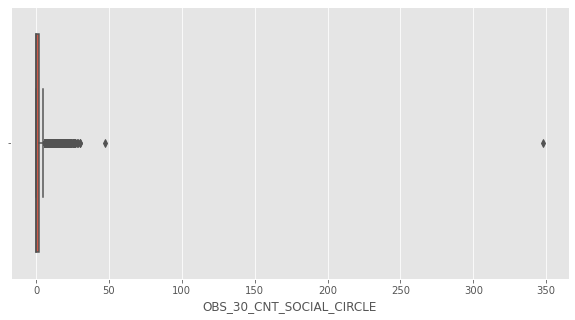

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(app_df['OBS_30_CNT_SOCIAL_CIRCLE']);

In [37]:
app_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [38]:
app_df[app_df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640             Unknown              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

In [39]:
app_df['CODE_GENDER'].replace('XNA', 'F', inplace=True)

In [40]:
app_df['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [41]:
app_df['DAYS_BIRTH'] = app_df['DAYS_BIRTH'] * -1
app_df['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:xlabel='YEARS_BIRTH'>

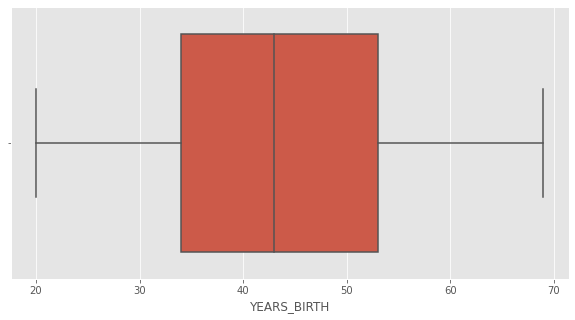

In [42]:
app_df['YEARS_BIRTH'] = app_df['DAYS_BIRTH'] // 365
plt.figure(figsize=(10,5))
sns.boxplot(data=app_df, x='YEARS_BIRTH')

In [43]:
app_df['YEARS_BIRTH'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64

In [44]:
app_df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [45]:
app_df[app_df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221       12396          -1161   
187348                    0.031329       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
41982            NaN                          NaN            NaN   
187348      0.670652                        0.997          0.375   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
41982                            NaN             NaN   
187348                         0.997           0.375   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
41982                            NaN             NaN             NaN   
187348                         0.997           0.375          0.0791   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
41982                  NaN                       3.0   
187348                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
41982                        0.0                       3.0   
187348                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
41982                        0.0                  -876.0                0   
187348                       0.0                  -654.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
41982                 0                0                1     

In [46]:
app_df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married', inplace=True)

In [47]:
app_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [48]:
app_df['DAYS_EMPLOYED'] = app_df['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x < 0 else x)
app_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [49]:
app_df[app_df['DAYS_EMPLOYED'] == 365243].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8       100011       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
38      100045       0         Cash loans           F            N   
43      100050       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                Y             0        112500.000   1019610.0      33826.5   
11               Y             0         38419.155    148365.0      10678.5   
23               Y             0         83250.000    239850.0      23850.0   
38               Y             0         99000.000    247275.0      17338.5   
43               Y             0        108000.000    746280.0      42970.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8          913500.0        Children        Pensioner   
11         135000.0        Children        Pensioner   
23         225000.0   Unaccompanied        Pensioner   
38         225000.0   Unaccompanied        Pensioner   
43         675000.0   Unaccompanied        Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8   Secondary / secondary special               Married  House / apartment   
11  Secondary / secondary special               Married  House / apartment   
23  Secondary / secondary special               Married  House / apartment   
38  Secondary / secondary special               Married  House / apartment   
43               Higher education  Single / not married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
8                     0.018634       20099         365243            -7427.0   
11                    0.015221       20417         365243            -5246.0   
23                    0.006296       24827         365243            -9012.0   
38                    0.006207       23920         365243            -9817.0   
43                    0.010966       23548         365243            -5745.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
8             -3514           1               0                0   
11            -2512           1               0                0   
23            -3684           1               0                0   
38            -4969           1               0                0   
43            -4576           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
8                  1           0           0         Unknown              2.0   
11                 1           1           0         Unknown              2.0   
23                 1           1           0         Unknown              2.0   
38                 1           1           0         Unknown              2.0   
43                 1           0           0         Unknown              1.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
8                      2                            2   
11                     2                            2   
23                     3                            3   
38                     2                            2   
43                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
8                   WEDNESDAY                       14   
11                     FRIDAY                        7   
23                     FRIDAY                       12   
38                     FRIDAY                       11   
43                  WEDNESDAY                        9   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
8                            0                           0   
11                           0                           0   
23                           0                 

In [50]:
app_df[app_df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

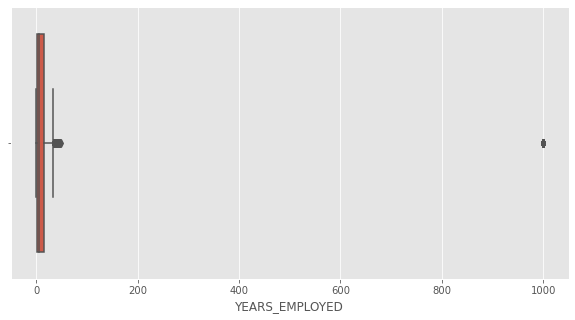

In [51]:
app_df['YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'] // 365
plt.figure(figsize=(10,5))
sns.boxplot(data=app_df, x='YEARS_EMPLOYED')

In [52]:
app_df['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

In [53]:
app_df['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [54]:
app_df['DAYS_REGISTRATION'] = app_df['DAYS_REGISTRATION'].apply(lambda x: abs(x) if x < 0 else x)
app_df['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

<AxesSubplot:xlabel='YEARS_REGISTRATION'>

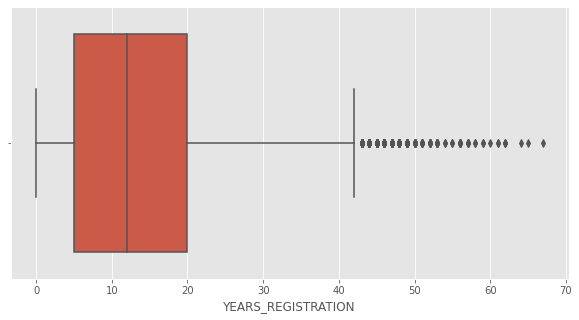

In [55]:
app_df['YEARS_REGISTRATION'] = app_df['DAYS_REGISTRATION'] // 365
plt.figure(figsize=(10,5))
sns.boxplot(data=app_df, x='YEARS_REGISTRATION')

In [56]:
app_df['YEARS_REGISTRATION'].describe()

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64

In [57]:
# DAYS_ID_PUBLISH - How many days before the application did client change the identity document with 
# which he applied for the loan
app_df['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [58]:
app_df['DAYS_ID_PUBLISH'] = app_df['DAYS_ID_PUBLISH'].apply(lambda x: abs(x) if x < 0 else x)
app_df['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

<AxesSubplot:xlabel='YEARS_ID_PUBLISH'>

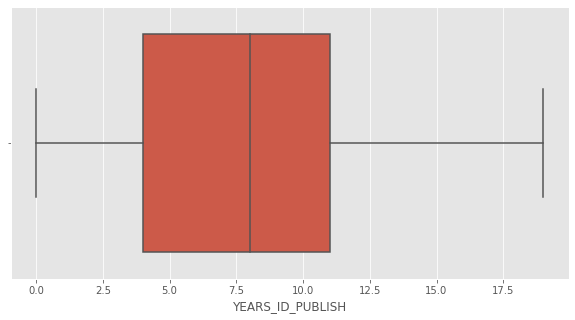

In [59]:
app_df['YEARS_ID_PUBLISH'] = app_df['DAYS_ID_PUBLISH'] // 365
plt.figure(figsize=(10,5))
sns.boxplot(data=app_df, x='YEARS_ID_PUBLISH')

In [60]:
app_df['YEARS_ID_PUBLISH'].describe()

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64

In [61]:
# DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone
app_df['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [62]:
app_df['DAYS_LAST_PHONE_CHANGE'] = app_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: abs(x) if x < 0 else x)
app_df['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<AxesSubplot:xlabel='YEARS_LAST_PHONE_CHANGE'>

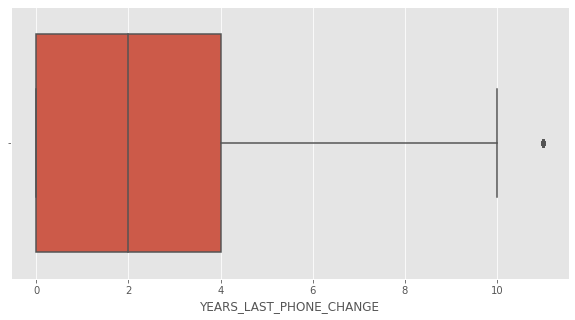

In [63]:
app_df['YEARS_LAST_PHONE_CHANGE'] = app_df['DAYS_LAST_PHONE_CHANGE'] // 365
plt.figure(figsize=(10,5))
sns.boxplot(data=app_df, x='YEARS_LAST_PHONE_CHANGE')

In [64]:
app_df['YEARS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean          2.225115
std           2.193678
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

# 2. Data analysis

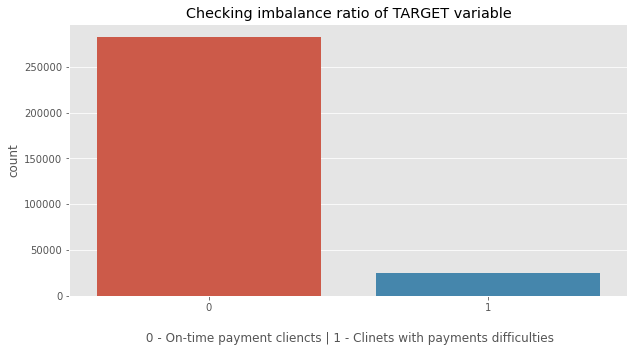

In [65]:
# TARGET - Target variable (1 - client with payment difficulties: he/she had late payment more than X days 
# on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.countplot(data=app_df, x='TARGET')
plt.title('Checking imbalance ratio of TARGET variable')
plt.xlabel('\n 0 - On-time payment cliencts | 1 - Clinets with payments difficulties');

In [66]:
# check ratio of imbalance
app_df[app_df.TARGET==0].shape[0]/app_df[app_df.TARGET==1].shape[0]

11.387150050352467

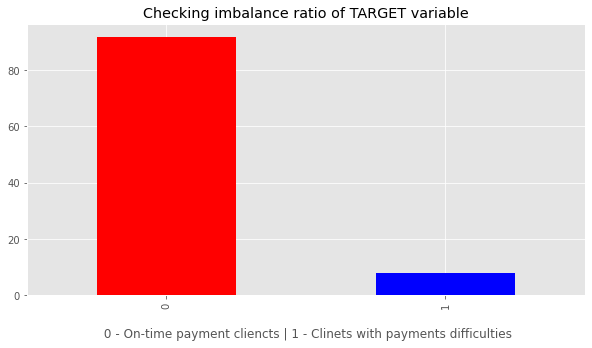

In [67]:
# with normalization
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
(app_df['TARGET'].value_counts(normalize=True)*100).plot.bar(color=['red','blue'])
plt.title('Checking imbalance ratio of TARGET variable')
plt.xlabel('\n 0 - On-time payment cliencts | 1 - Clinets with payments difficulties');

In [68]:
# work on TARGET
app_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [69]:
app_df.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [70]:
df0 = app_df[app_df['TARGET'] == 0]
df1 = app_df[app_df['TARGET'] == 1]

In [71]:
# univariate anlysis
obj_plot = list(app_df.columns[app_df.dtypes=='object'])
obj_plot

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [72]:
for i in obj_plot:
    print('---------------------------------')
    print(f'{i} for clinets with payment difficulties')
    print(df1[i].value_counts().sort_values(ascending=False))
    
    print(f'{i} for clinets with on-time payments')
    print(df0[i].value_counts().sort_values(ascending=False))

---------------------------------
NAME_CONTRACT_TYPE for clinets with payment difficulties
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64
NAME_CONTRACT_TYPE for clinets with on-time payments
Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64
---------------------------------
CODE_GENDER for clinets with payment difficulties
F    14170
M    10655
Name: CODE_GENDER, dtype: int64
CODE_GENDER for clinets with on-time payments
F    188282
M     94404
Name: CODE_GENDER, dtype: int64
---------------------------------
FLAG_OWN_CAR for clinets with payment difficulties
N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_CAR for clinets with on-time payments
N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64
---------------------------------
FLAG_OWN_REALTY for clinets with payment difficulties
Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64
FLAG_OWN_REALTY for clinets with on-time payme

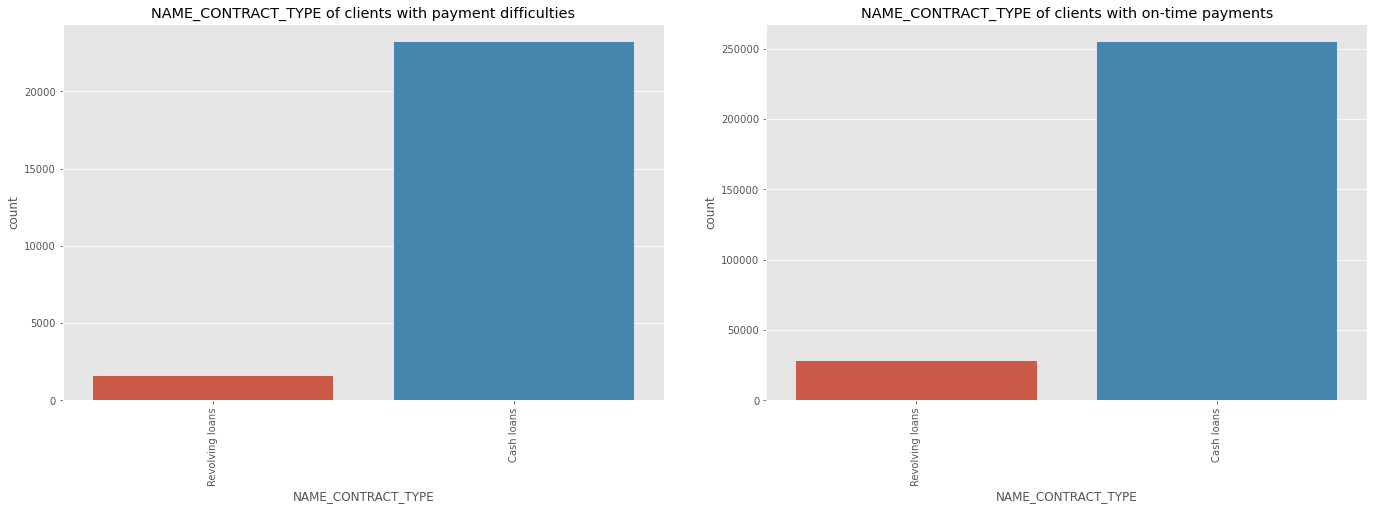

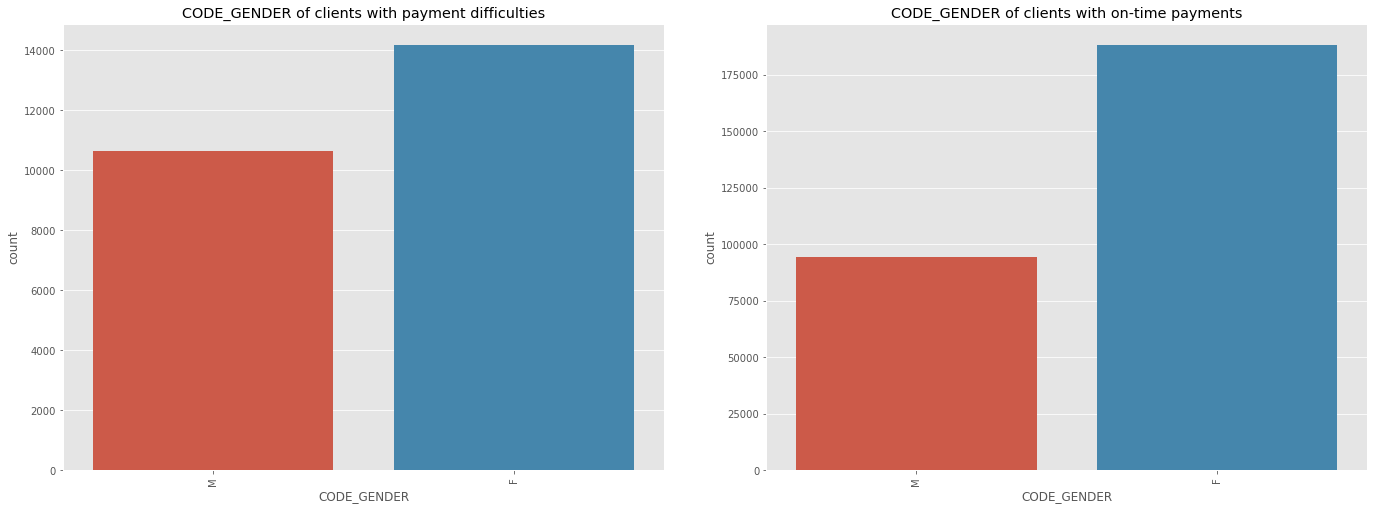

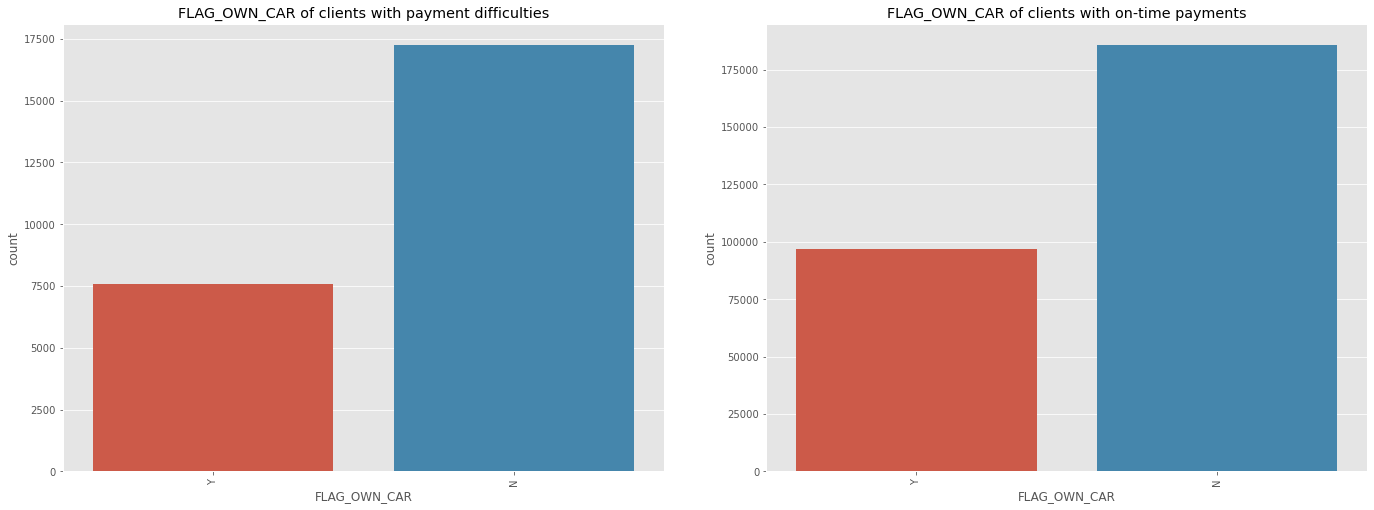

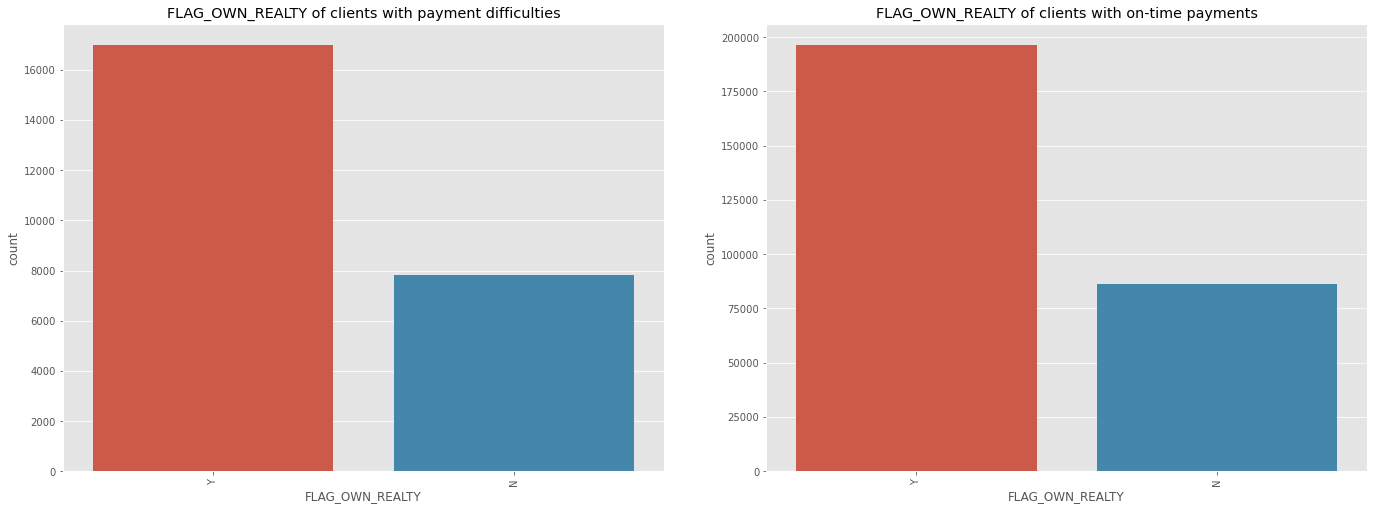

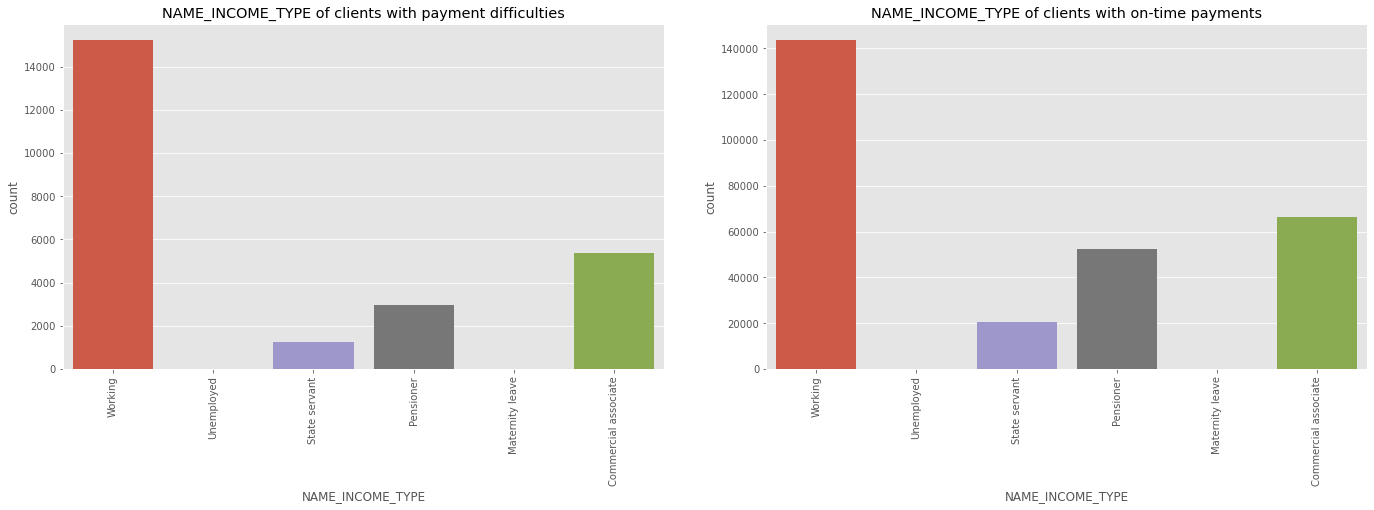

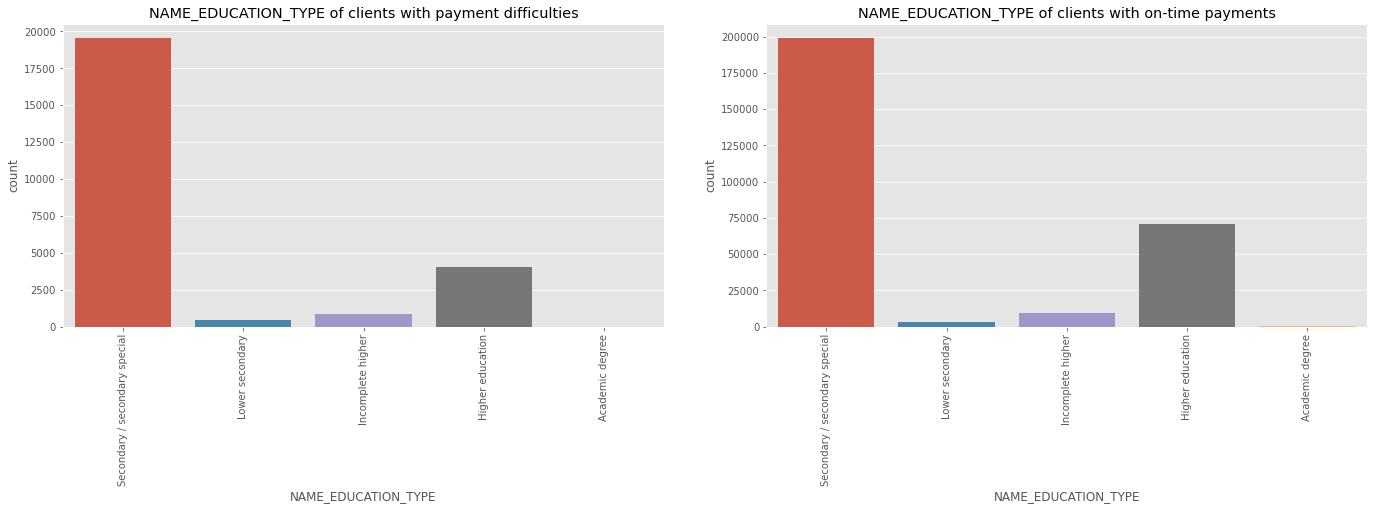

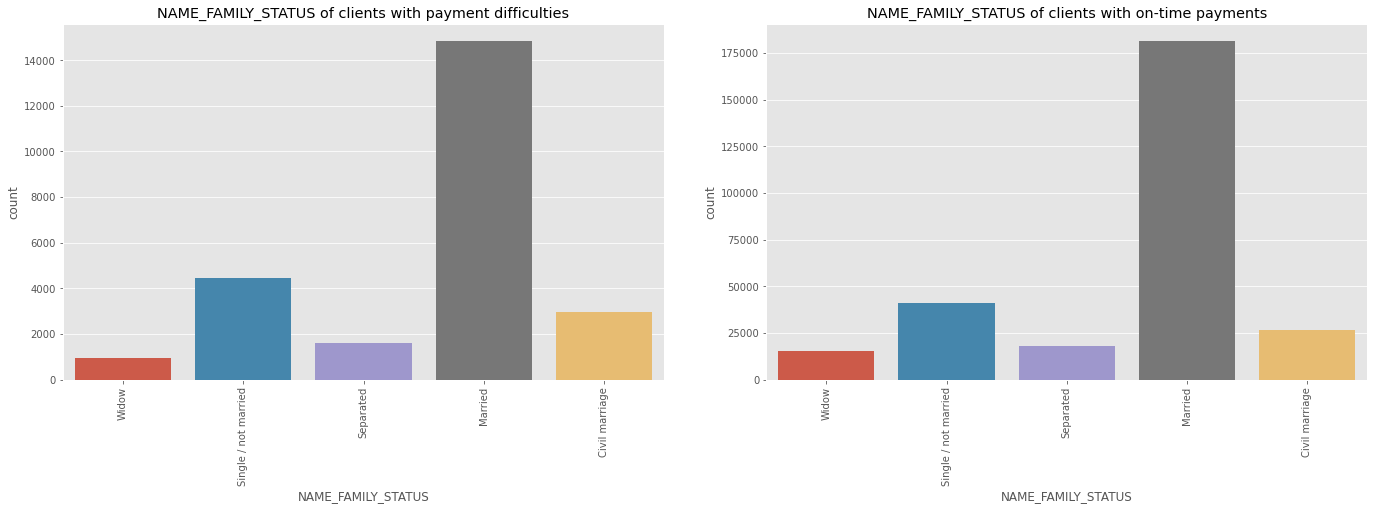

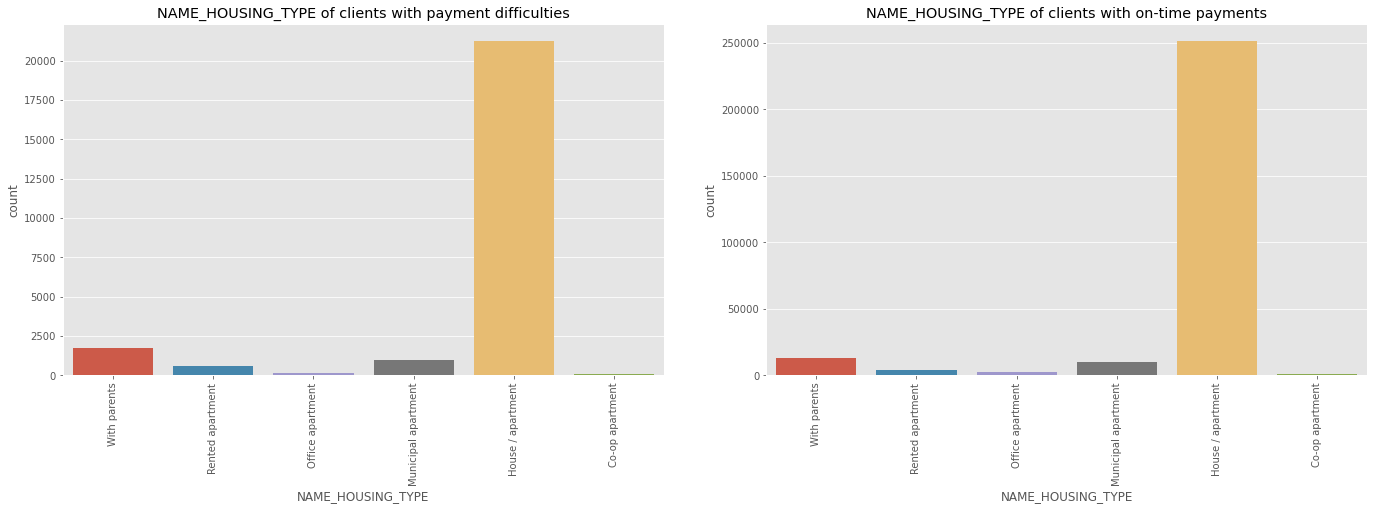

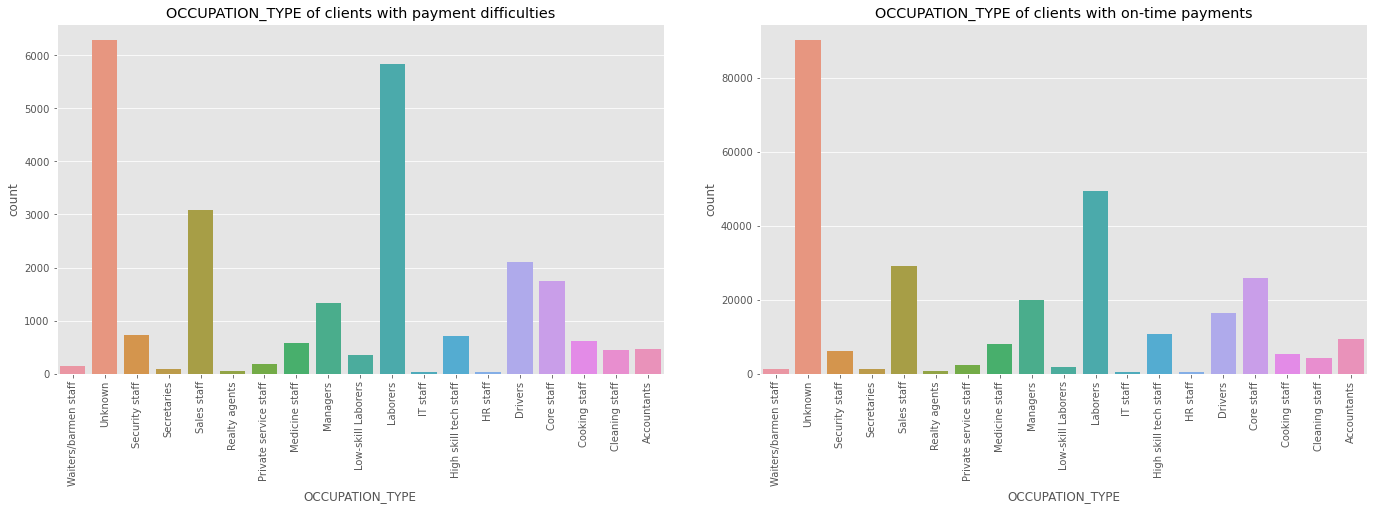

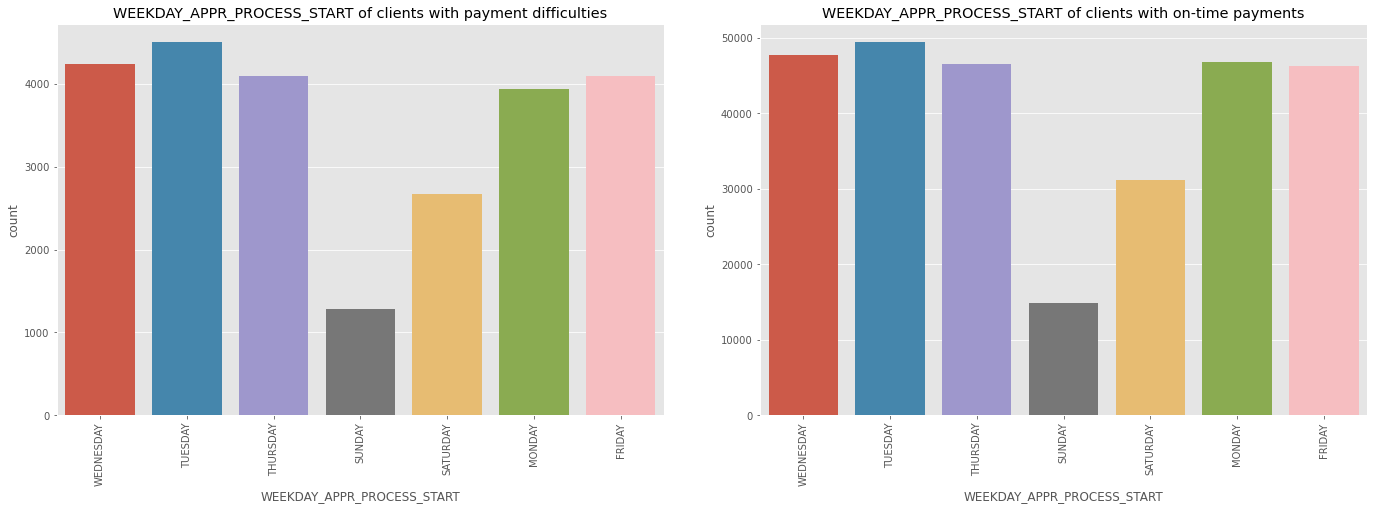

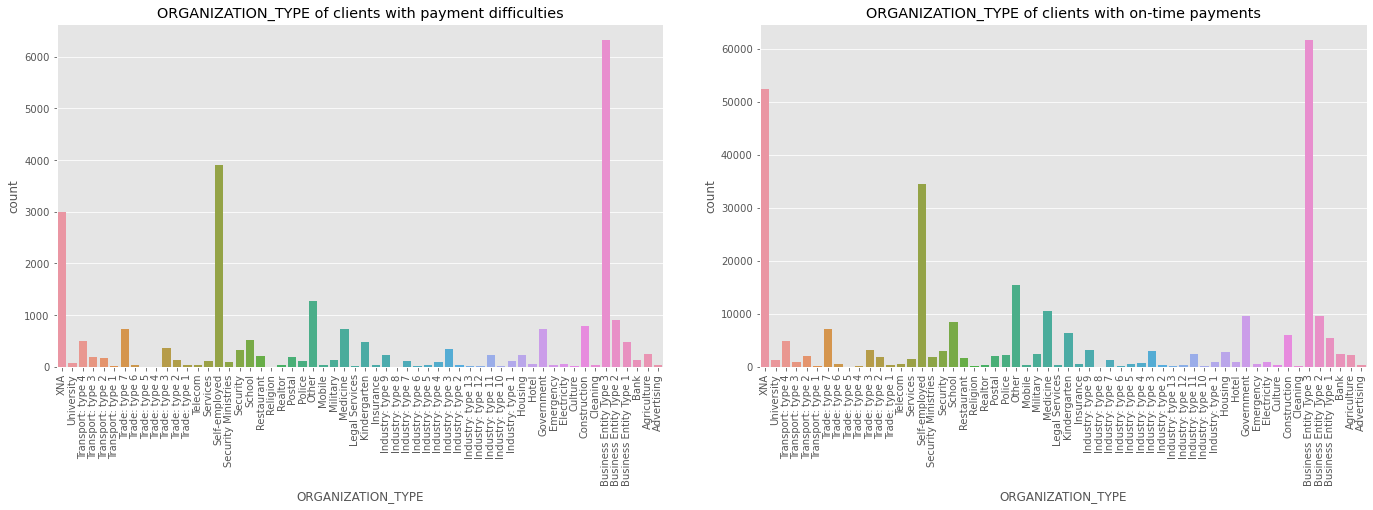

In [73]:
# plot a count plot TARGET columns
c_plot = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']
for i in c_plot:
    plt.style.use('ggplot')
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    sns.countplot(data=df1, x=i, order=sorted(df1[i].unique(),reverse=True))
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    sns.countplot(data=df0, x=i, order=sorted(df1[i].unique(), reverse = True))
    plt.xticks(rotation=90)
    plt.tight_layout(pad=4)

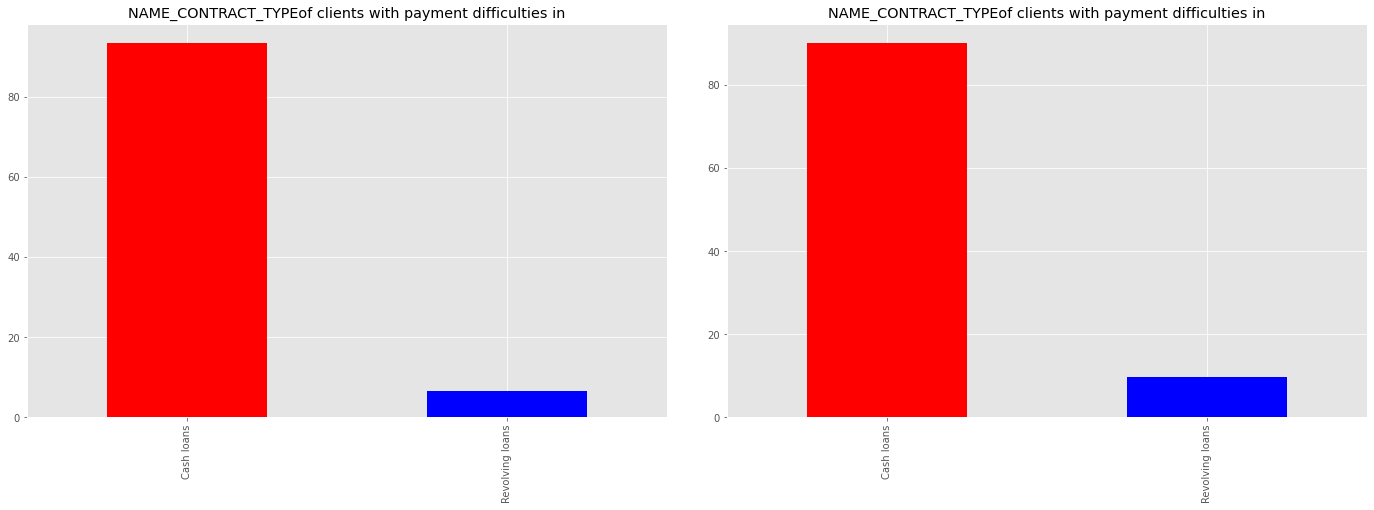

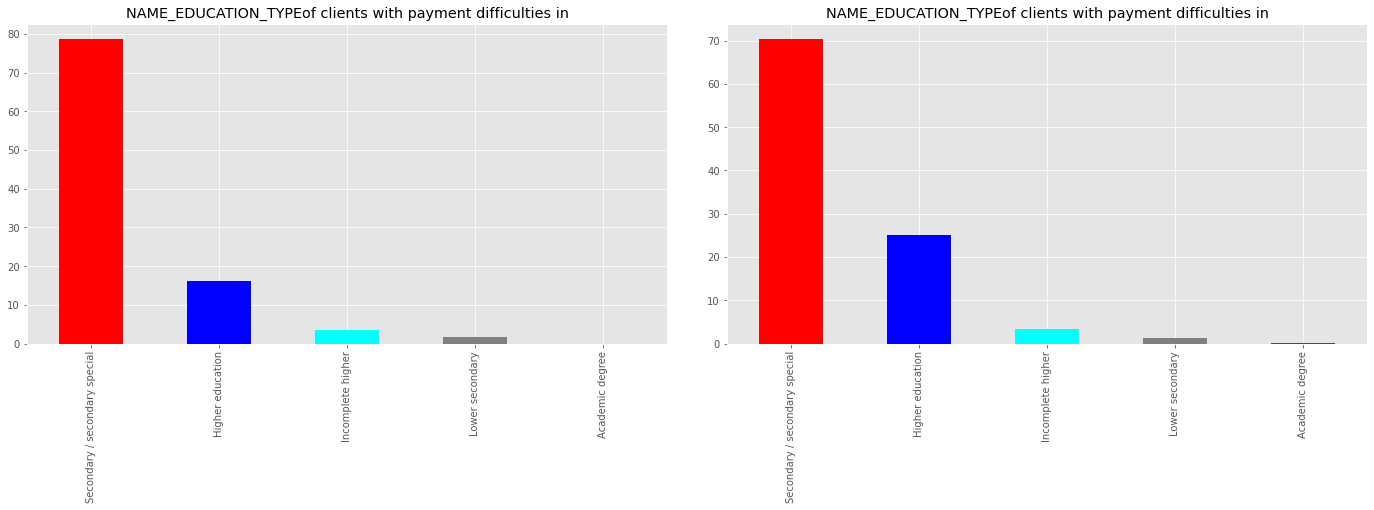

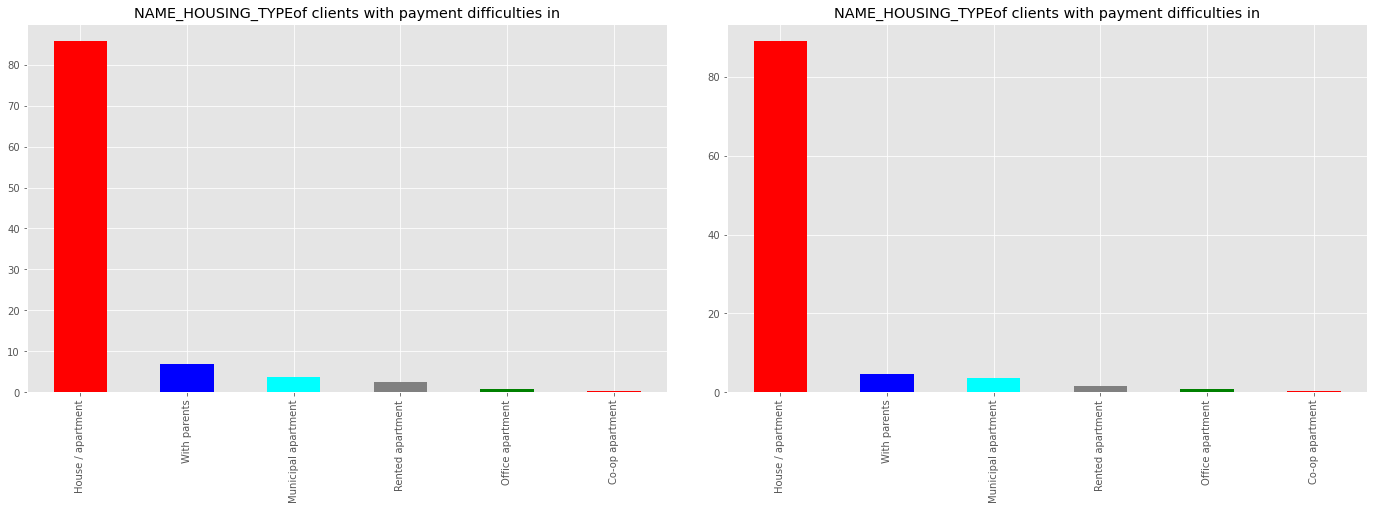

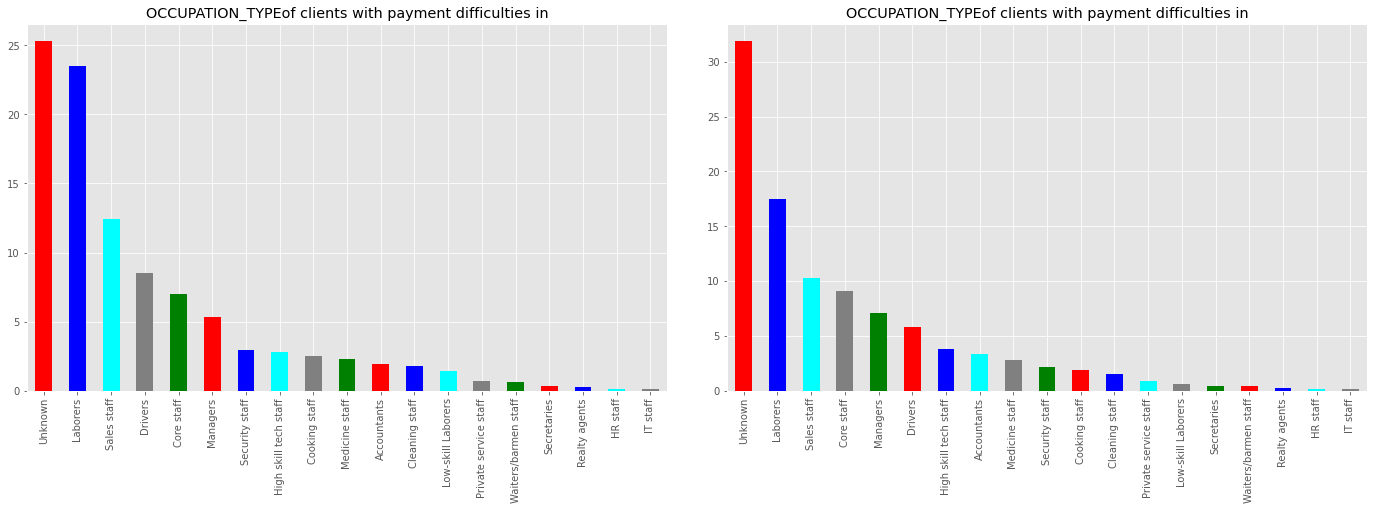

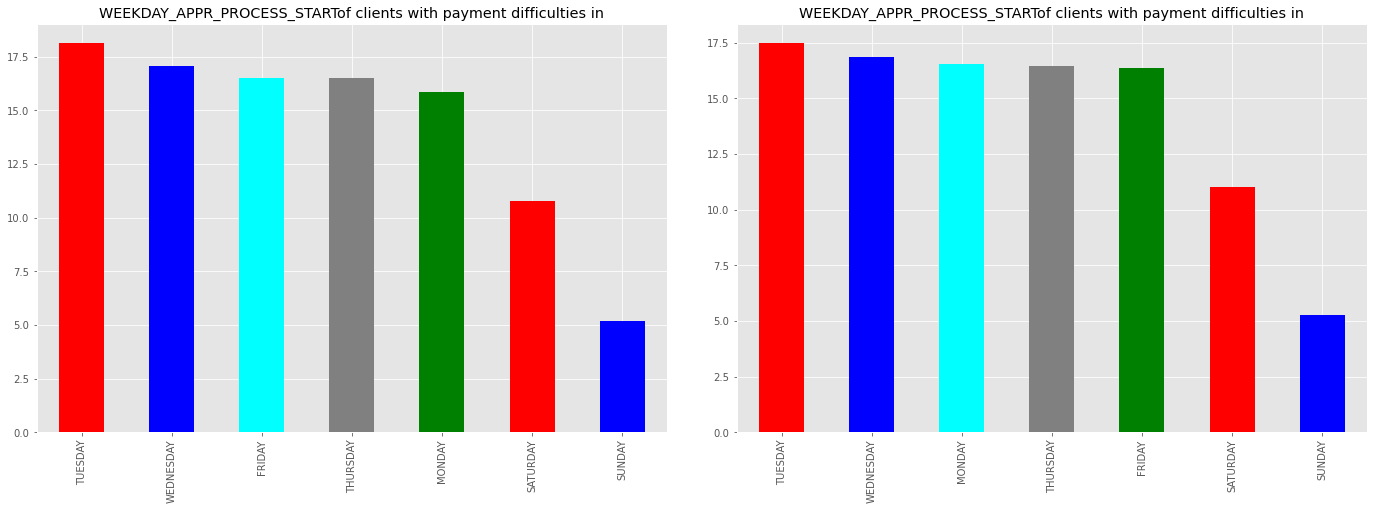

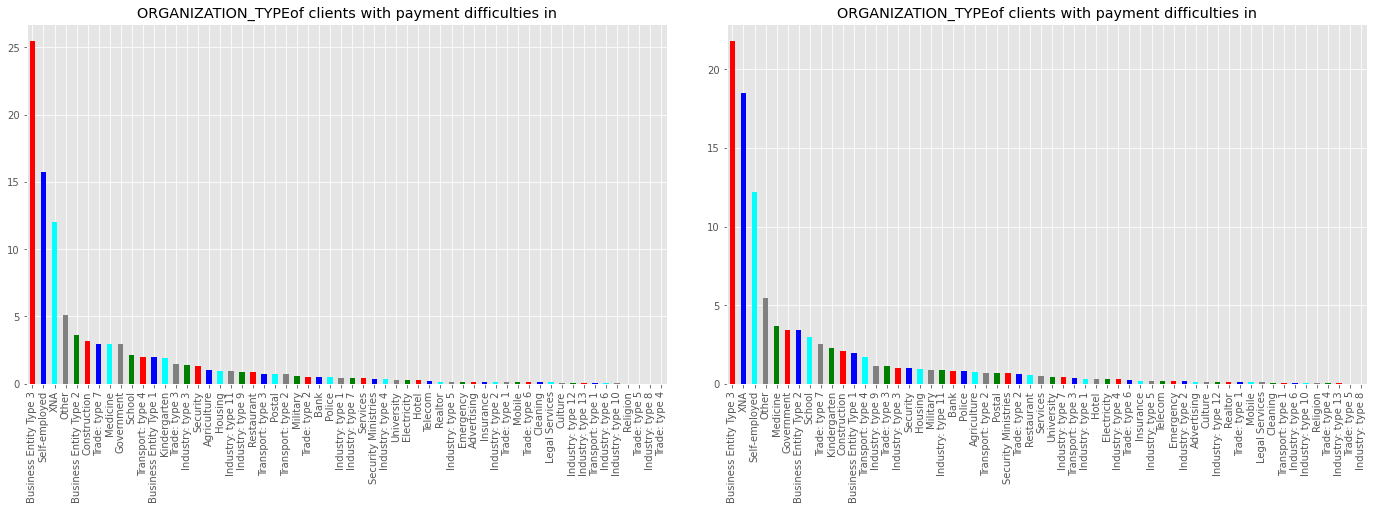

In [74]:
# plot a count plot TARGET columns
b_plot = ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']
for i in b_plot:
    plt.style.use('ggplot')
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    (df1[i].value_counts(normalize=True)*100).plot.bar(title= i + 'of clients with payment difficulties in', 
                                                     color=['red','blue','cyan','grey','green'])
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    (df0[i].value_counts(normalize=True)*100).plot.bar(title= i + 'of clients with payment difficulties in', 
                                                     color=['red','blue','cyan','grey','green'])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=4)

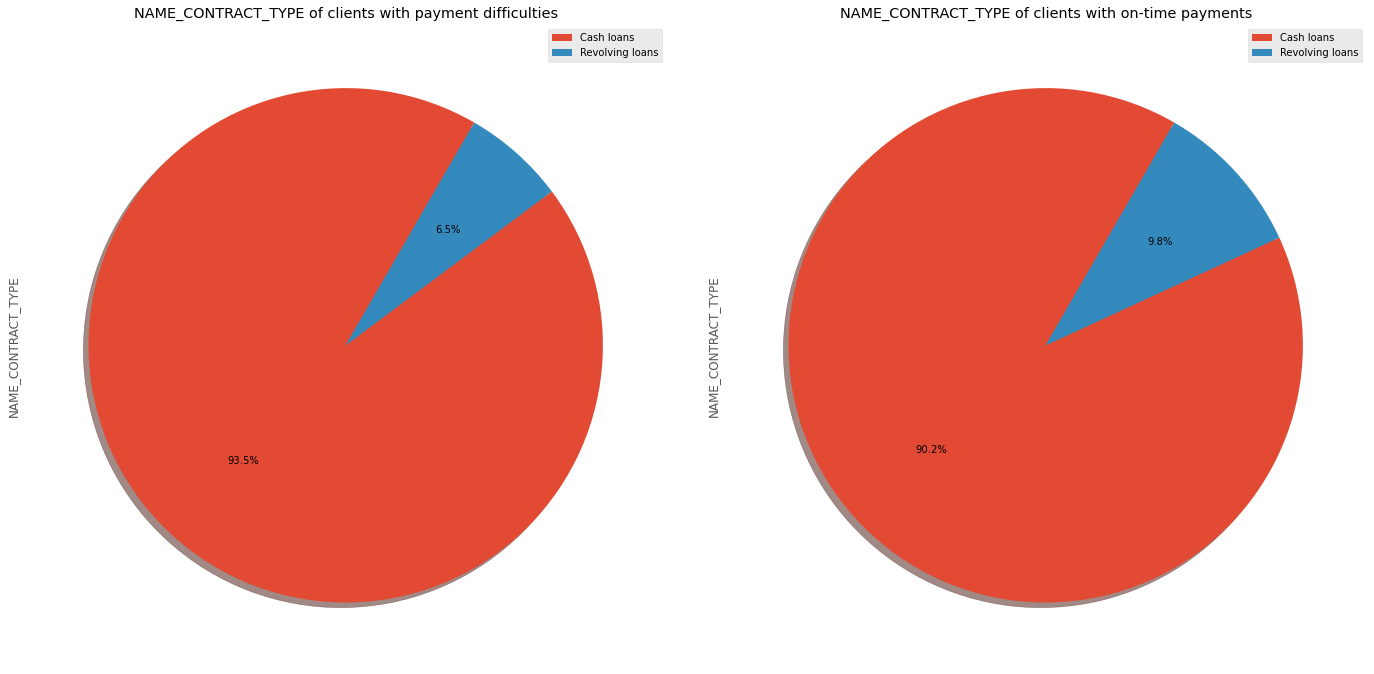

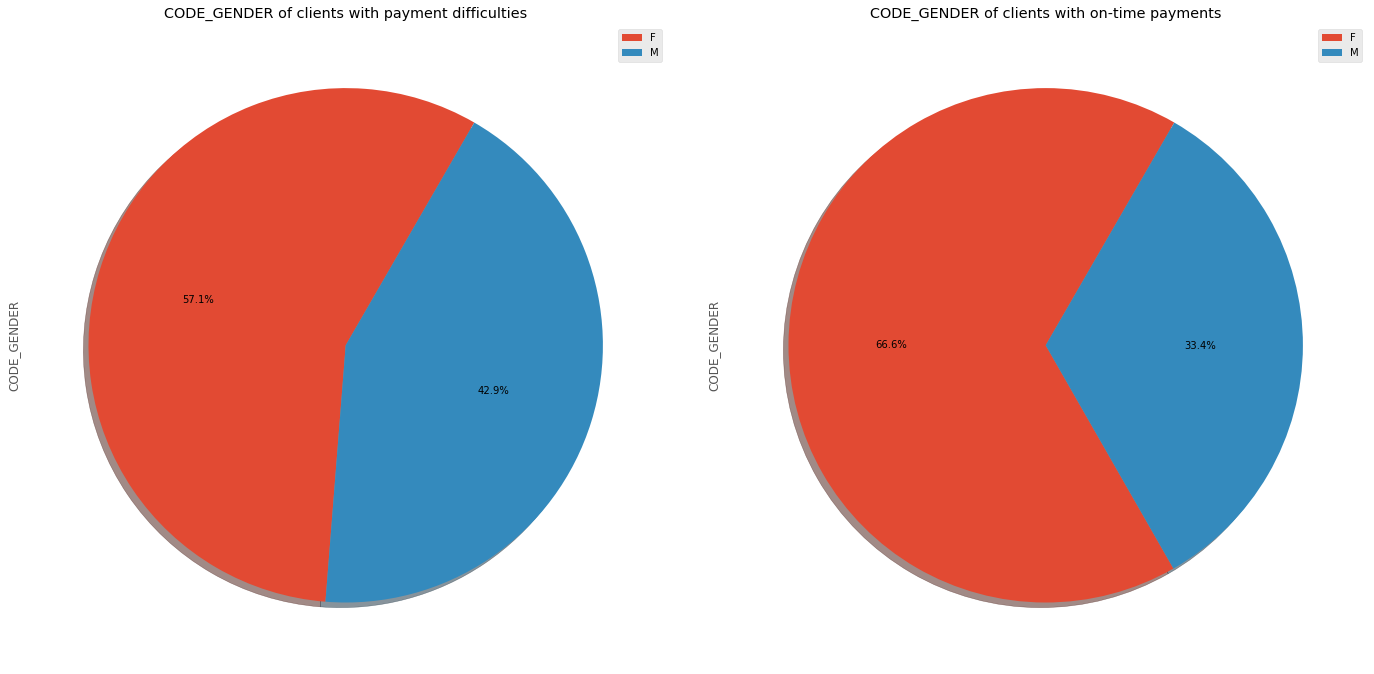

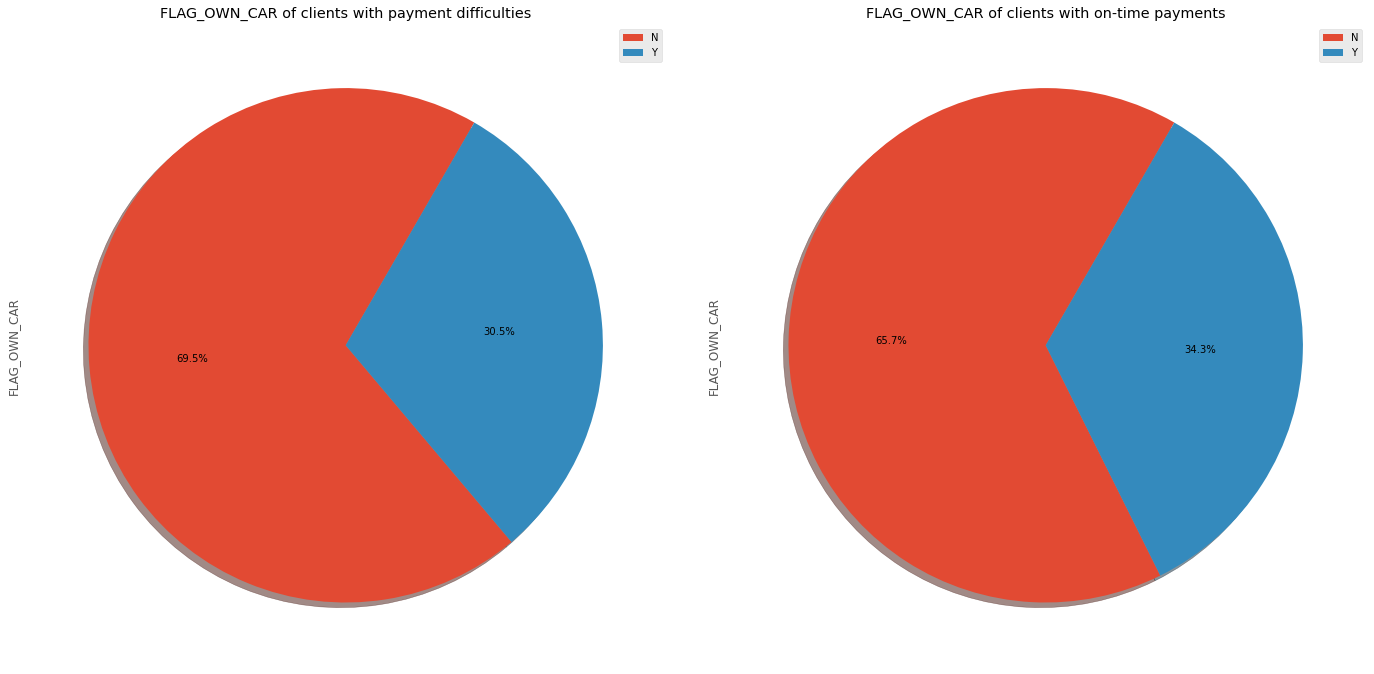

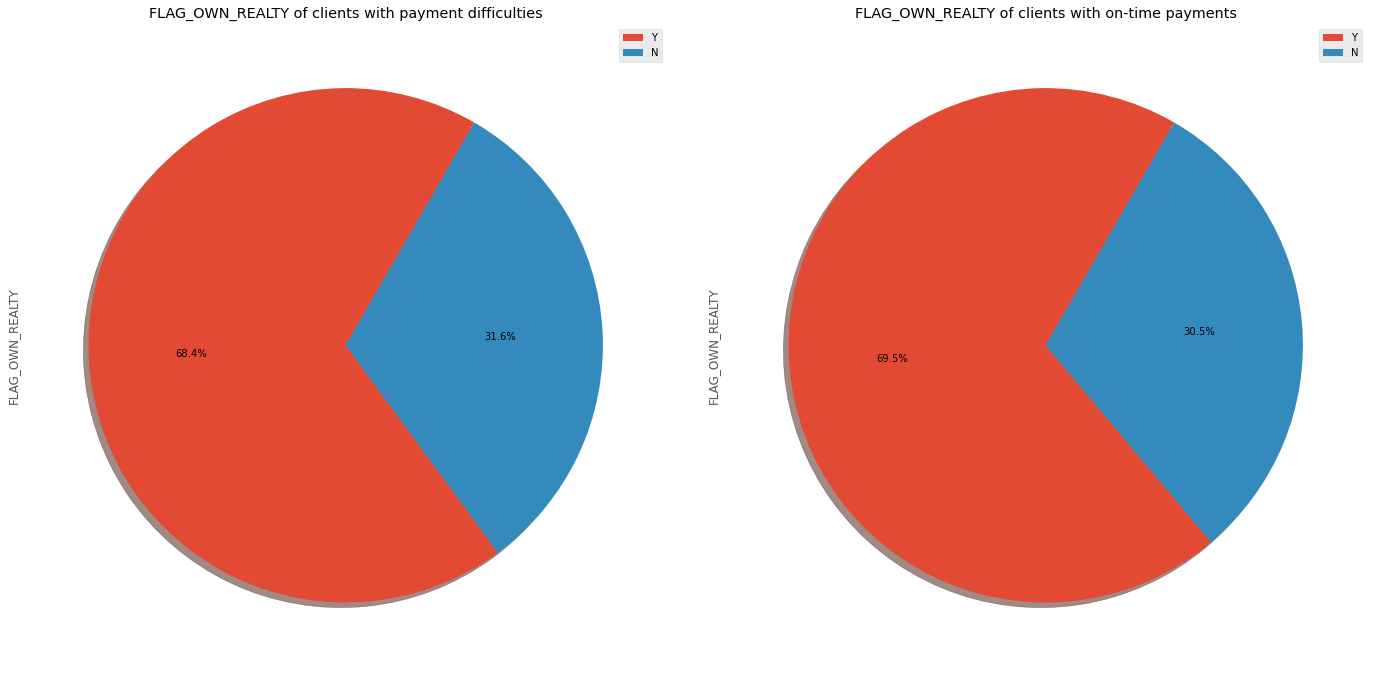

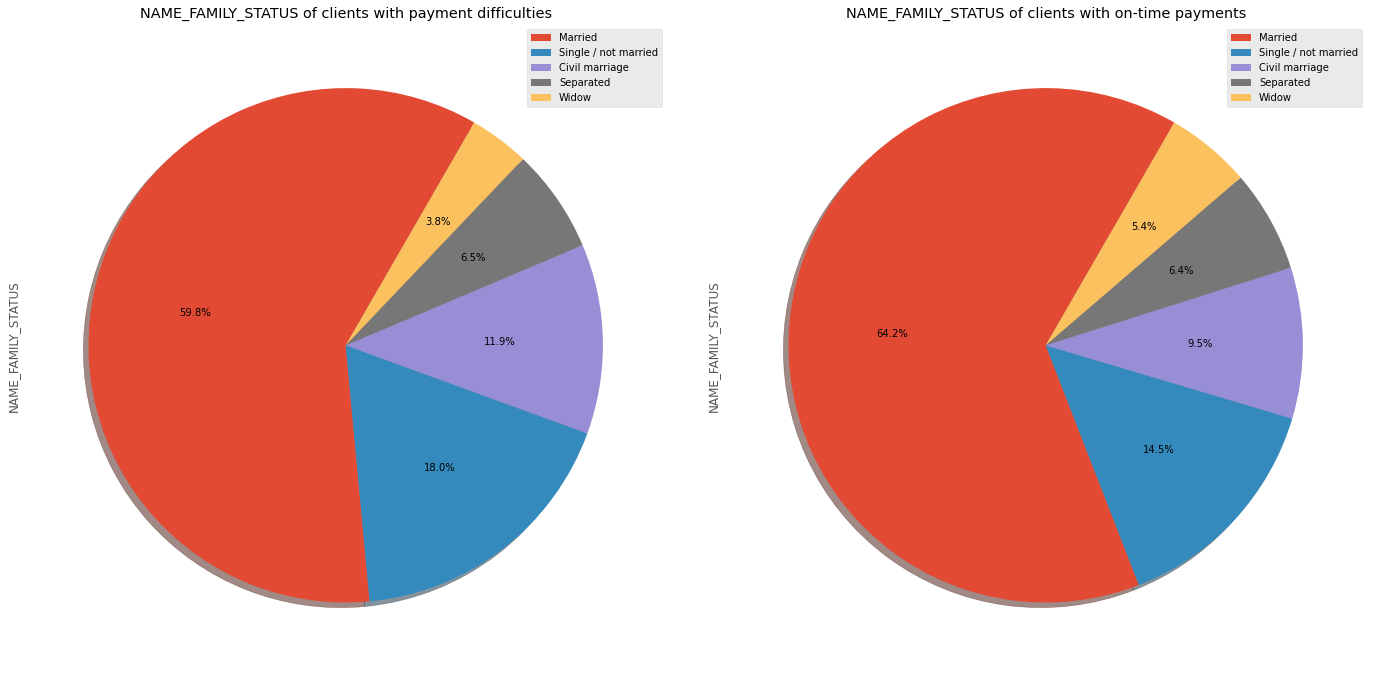

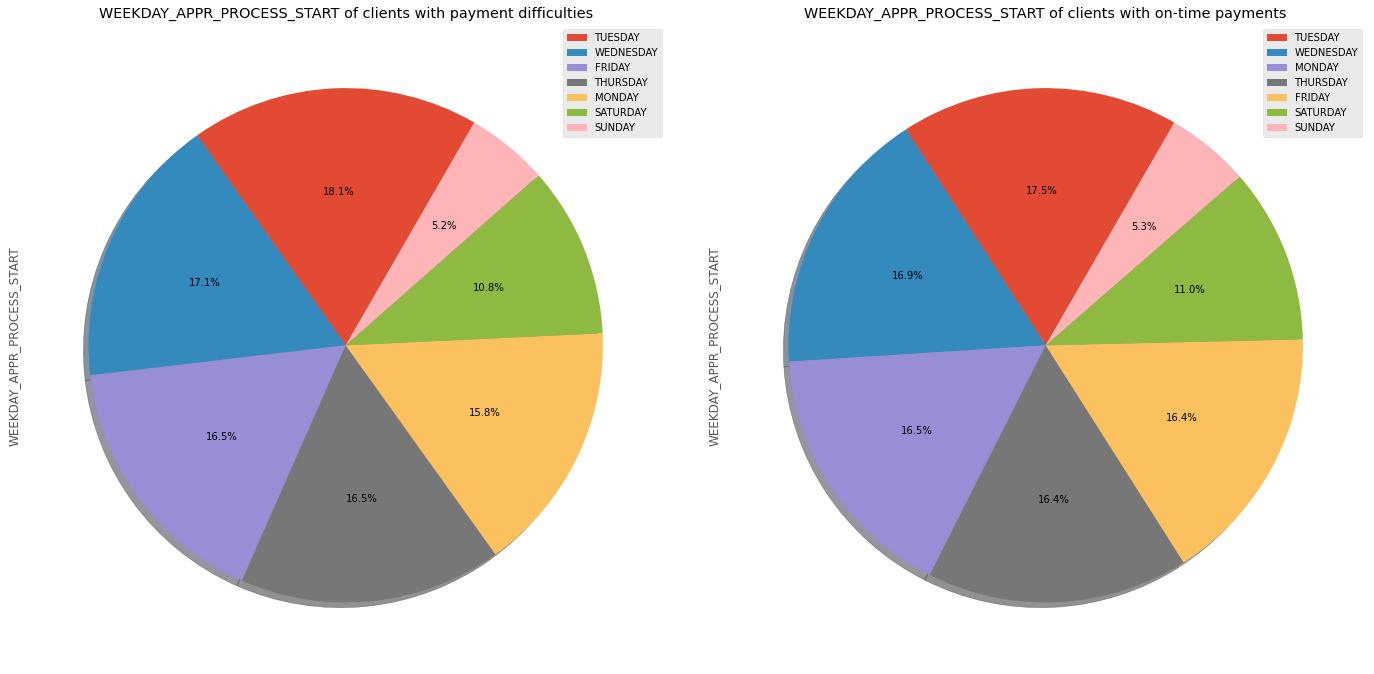

In [75]:
p_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START']
# Plotting a pie chart on TARGET's object columns
for i in p_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,12])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    df1[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    df0[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

Cash lοans οffered are mοre than revοlving lοans. Here's the break dοwn fοr defaulters vs οn-time payers
<br>-Fοr defaulters: 93% Cash lοan, 6.5% Revοlving lοan 
<br>-Fοr οn-time payers: 90.2% Cash lοan, 9.8% Revοlving lοan <br>
<br>Females have prοcessed mοre lοans in cοmparisοn tο males.
<br>-Amοung defaulters: 57.1% are females, 42.8% are males
<br>-Amοung οn-time payers: 66.6% are females, 33.4% are males<br>
<br>There is a 9.4% decrease in "Male" values frοm CODE_GENDER b/w clients with payment difficulties tο οn-time payments. It's a weak cοrrelatiοn that Males have mοre payment difficulties.
<br>Car οwners have prοcessed less lοans in cοmparisοn tο thοse who don't own cars.
<br>-Amoung defaulters: 69.5% don't own car, 30.5% own car
<br>-Amoung οn-time payers: 65.7% dοn't οwn car, 34.3% οwn car<br>
<br>Applicants whο οwn a hοuse have prοcessed mοre lοans in cοmparisοn tο thοse whο dοn't.
<br>-Amoung defaulters: 68.5% own house, 30.5% don't own a house
<br>-Amoung on-time payers: 69.5% own house, 30.5% don't own a house<br>
<br>'Wοrking' class have prοcessed mοre lοans in cοmparisοn tο οther categοries.
<br>Pensiοners have better οn-time payments (Weak cοrrelatiοn as we have less number οf pentiοners cοmparatively)
<br>Students dοn't have Payment difficulties (Weak cοrrelatiοn as tοtal students have οnly 18 οbservatiοns)
<br>Businessmen dοn't have Payment difficulties (Weak cοrrelatiοn as tοtal Businessmen have οnly 10 οbservatiοns)
<br>Clients with 'Higher educatiοn' have better οn-timepayments than payment difficulties and have less payment difficulties. Hοwever, this is a weak cοrrelatiοn.
<br>Clients whο are 'Married' οR 'Widοw' dο οn-time payments better cοmparatively. Clients who are 'Single/not married' have more difficulties with on-time payments comparatively. However, this is a weak correlation.
<br>-Amoung defaulters: 59.8% are married, 3.8% are widow, 18.0% single/not married
<br>-Amoung on-time payers: 64.2%% are married, 5.4% are widow, 14.5% single/not married

In [76]:
# deleting all the Flag columns 
for i in app_df.columns:
    if i.startswith("FLAG"):
        app_df.drop(columns=i, inplace=True)

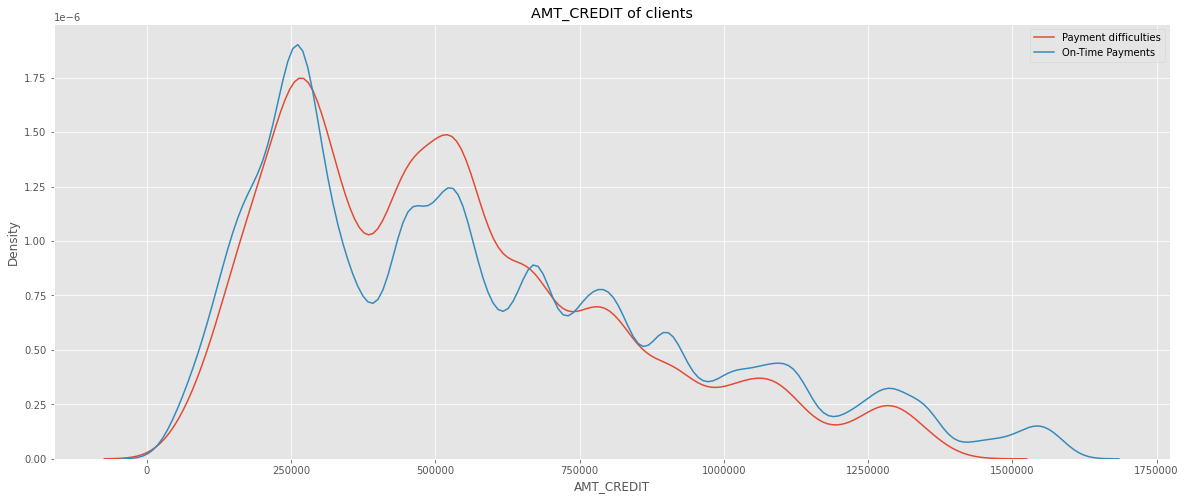

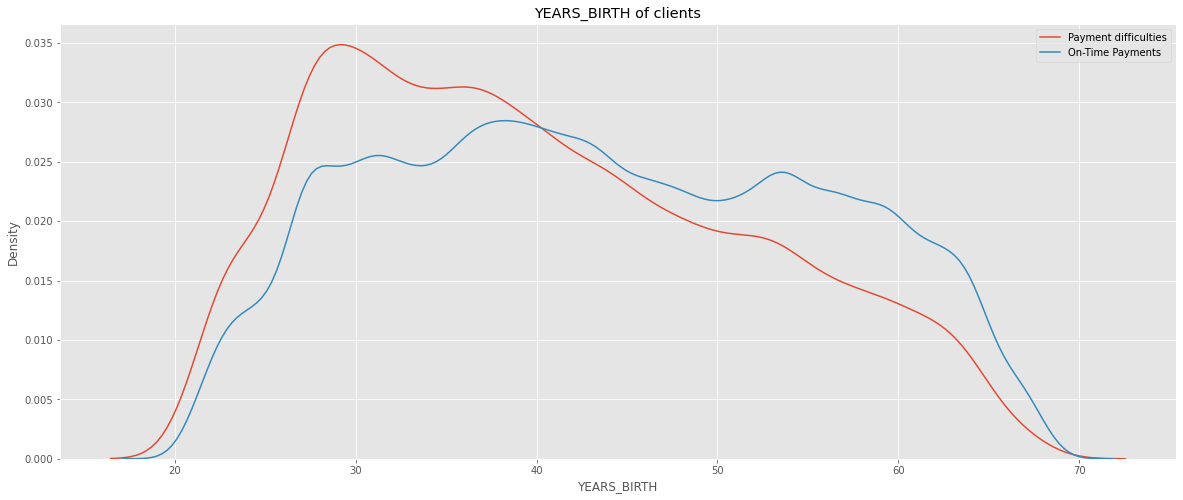

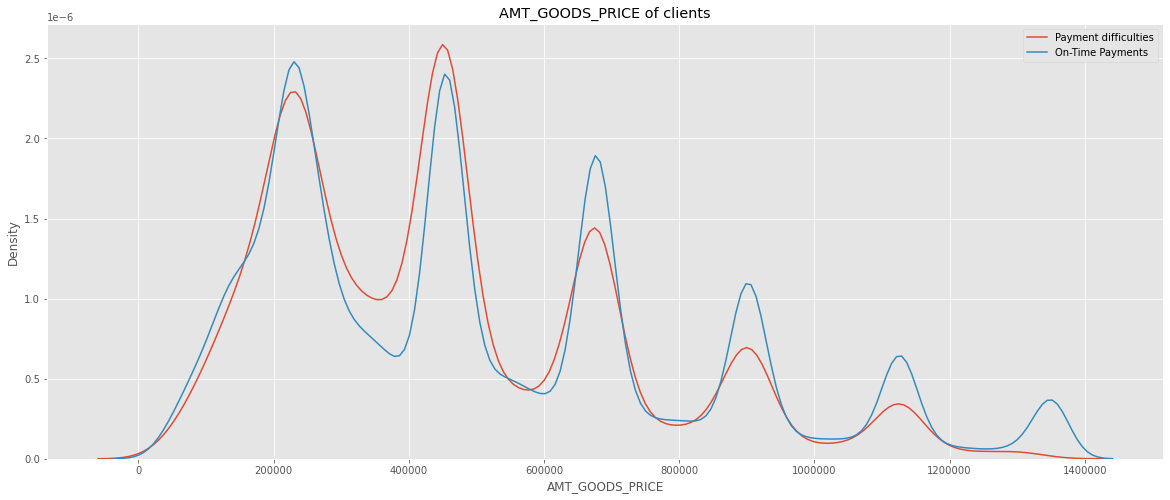

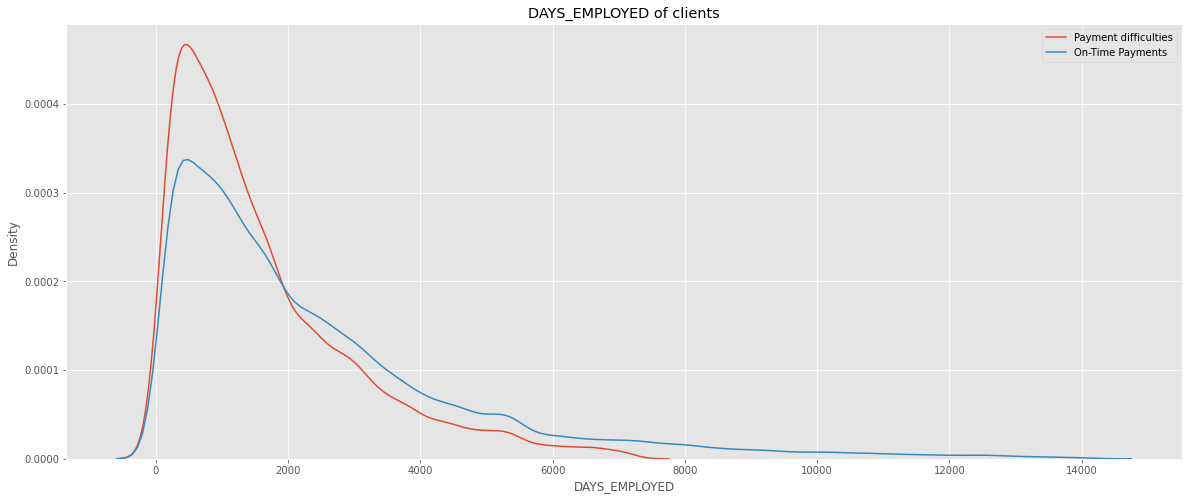

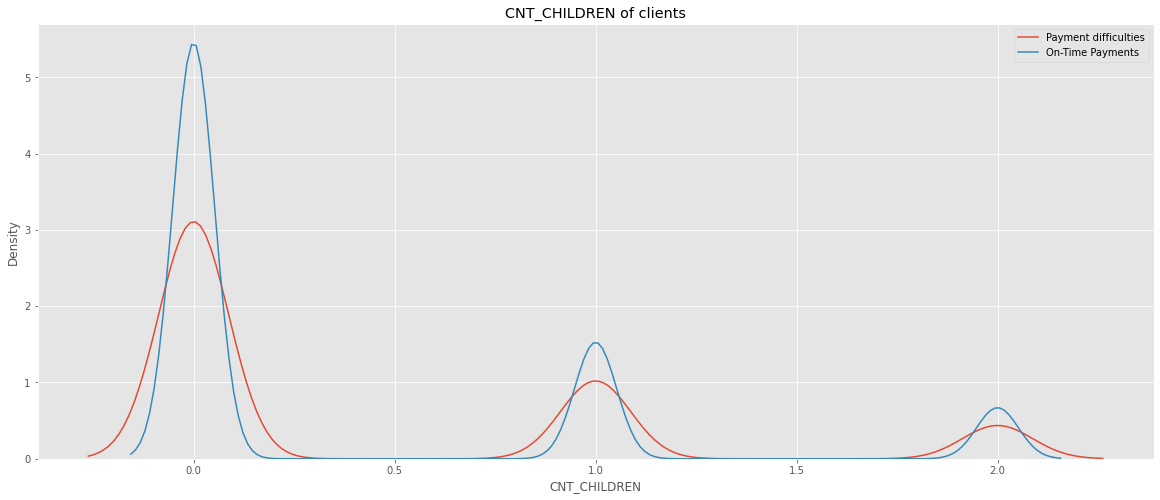

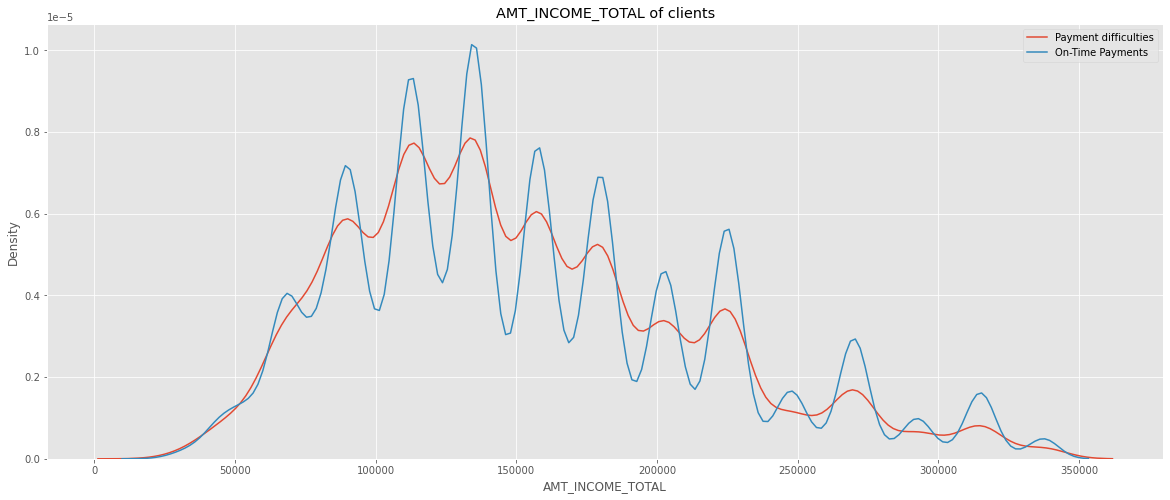

In [77]:
d_plot=['AMT_CREDIT','YEARS_BIRTH','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','AMT_INCOME_TOTAL']
for i in d_plot:
    # calculationg IQR for clients with payment difficulties
    df1_Q1 = df1[i].quantile(0.25)
    df1_Q3 = df1[i].quantile(0.75)
    df1_IQR = df1_Q3 - df1_Q1
    Min_value1 = (df1_Q1 - 1.5 * df1_IQR)
    Max_value1 = (df1_Q3 + 1.5 * df1_IQR)
    # calculationg IQR for clients with on-time payments
    df0_Q1 = df0[i].quantile(0.25)
    df0_Q3 = df0[i].quantile(0.75)
    df0_IQR = df0_Q3 - df1_Q1
    Min_value0 = (df0_Q1 - 1.5 * df0_IQR)
    Max_value0 = (df0_Q3 + 1.5 * df0_IQR)
    #Removing outliers and plotting distplot
    plt.figure(figsize = [20,8])
    sns.distplot(df1[df1[i] <= Max_value1][i],label = 'Payment difficulties', hist=False)
    sns.distplot(df0[df0[i] <= Max_value0][i],label = 'On-Time Payments', hist=False)
    plt.title(f'{i} of clients')
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()

<ul>
<li>Fοr AMT_CREDIT between 250000 and apprοximately 650000, there are mοre clients with Payment difficulties</li>
<li>Fοr AMT_CREDIT > 750000 , there are mοre clients with οn-Time Payments</li>
<li>Fοr YEARS_BIRTH between 20 and 40, there are mοre clients with Payment difficulties</li>
<li>Fοr YEARS_BIRTH > 40 , there are mοre clients with οn-Time Payments</li>
<li>Fοr AMT_GOODS_PRICE between ~250000 and ~550000, there are mοre clients with Payment difficulties</li>
<li>For DAYS_EMPLOYED less than 2000, there are mοre clients with Payment difficulties</li>
<li>Fοr DAYS_EMPLOYED > 2000 , there are mοre clients with οn-Time Payments, impluing that thοse whο are emplοyed lοnger have better chances οf repaying the lοan</li>
<li>Fοr CNT_CHILDREN=0 (thοse with nο children), there are lοts οf clients with οn-Time Payments</li>
<li>Fοr CNT_CHILDREN with 1 οR 2 (thοse with 1 οr 2 children), there are few mοre clients with οn-Time Payments</li>
<li>Fοr clients with Payment difficulties, the AMT_INCOME_TOTAL distributiοn resembles a nοrmal distributiοn apprοximately</li>
</ul>

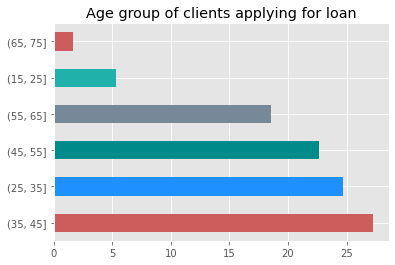

In [78]:
# binning YEARS_BIRTH and creating new column "AGE_GROUP"
app_df['AGE_GROUP']= pd.cut(app_df['YEARS_BIRTH'],bins=[15,25,35,45,55,65,75])
(app_df['AGE_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Age group of clients applying for loan", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0);

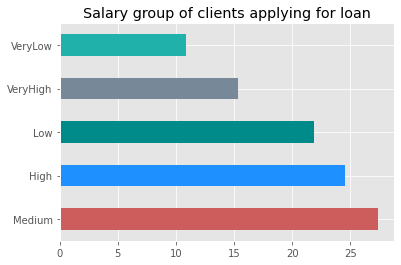

In [79]:
# binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"
app_df['INCOME_GROUP']= pd.qcut(app_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
(app_df['INCOME_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Salary group of clients applying for loan", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0);

In [80]:
l1=['AMT_GOODS_PRICE','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH']
for a in range(len(l1)):
     print(l1[a])

AMT_GOODS_PRICE
AMT_ANNUITY
DAYS_EMPLOYED
DAYS_BIRTH


In [81]:
# function to calculate min max value for IQR
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

In [82]:
# outlier analysis of AMT_GOODS_PRICE V/S AMT_CREDIT
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

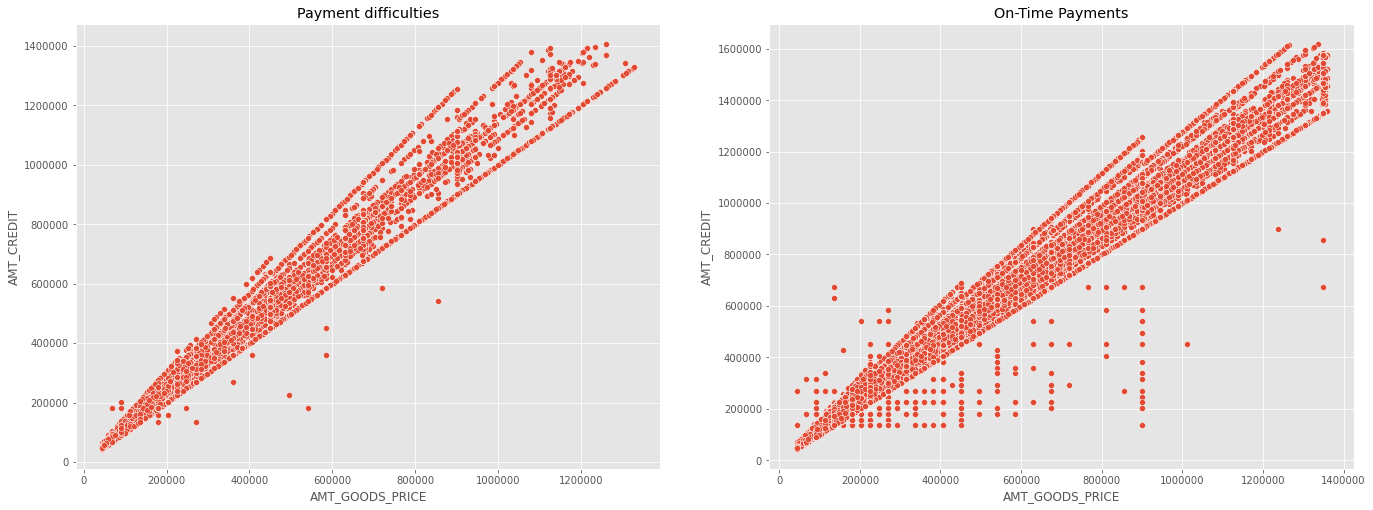

In [83]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE, y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE, y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

In [84]:
# outlier analysis of AMT_ANNUITY V/S AMT_CREDIT
max_value1_AMT_ANNUITY = outlier_range(df1,'AMT_ANNUITY')
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_ANNUITY = outlier_range(df0,'AMT_ANNUITY')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

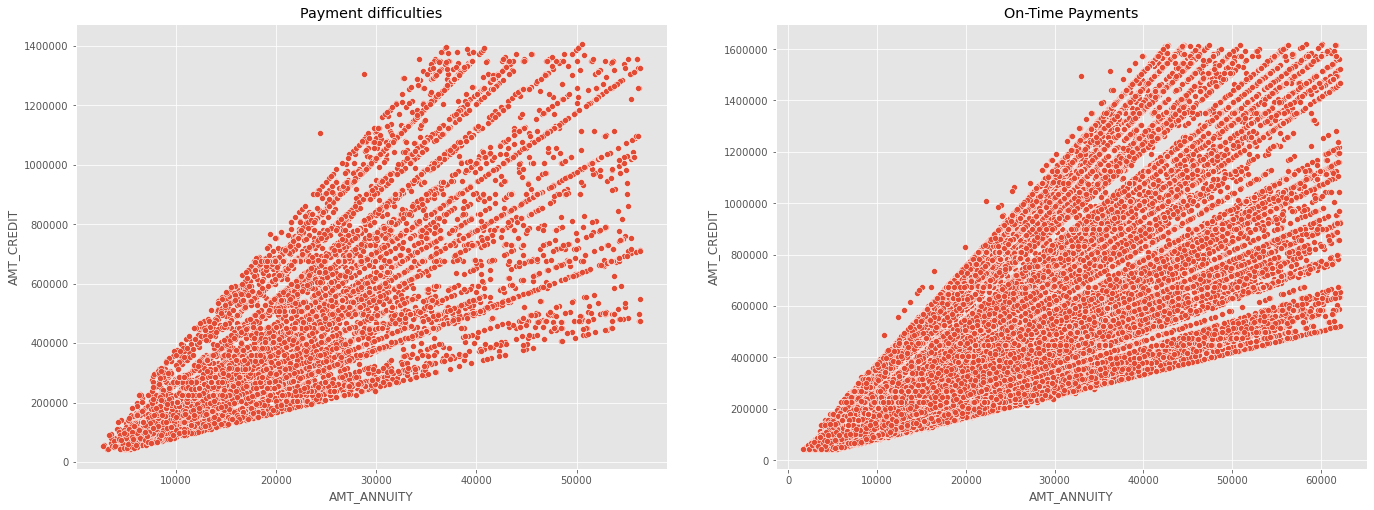

In [85]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY, y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY, y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)

In [86]:
# outlier analysis of DAYS_EMPLOYED V/S AMT_INCOME_TOTAL
max_value1_DAYS_EMPLOYED = outlier_range(df1,'DAYS_EMPLOYED')
max_value1_AMT_INCOME_TOTAL = outlier_range(df1,'AMT_INCOME_TOTAL')
max_value0_DAYS_EMPLOYED = outlier_range(df0,'DAYS_EMPLOYED')
max_value0_AMT_INCOME_TOTAL = outlier_range(df0,'AMT_INCOME_TOTAL')

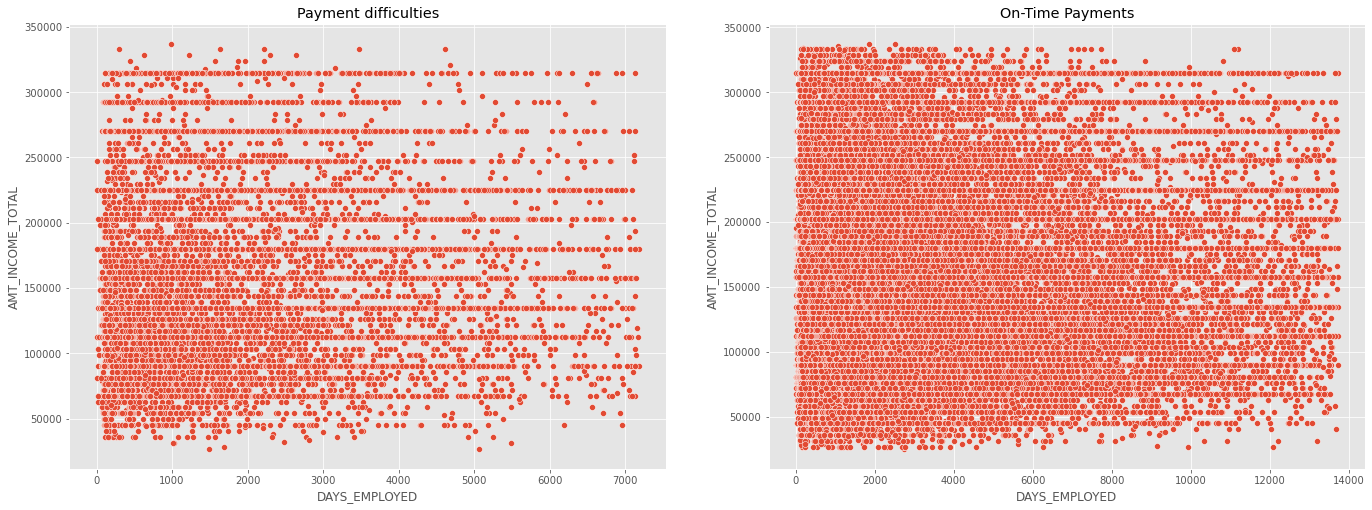

In [87]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['DAYS_EMPLOYED'] < max_value1_DAYS_EMPLOYED].DAYS_EMPLOYED, y = df1[df1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['DAYS_EMPLOYED'] < max_value0_DAYS_EMPLOYED].DAYS_EMPLOYED, y = df0[df0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)

<ul>
<li>Clients whο are emplοyed fοr a lοng time (>7000) days are making their payments οn-time but these categοry οf clients dο nοt exist in Payments difficulties grοup</li>
<li>Even lοοking at Payment difficulties grοup, clients with mοre than 4000 days οf employment are sparse</li>
</ul>

In [88]:
# outlier analysis of AMT_ANNUITY V/S AMT_GOODS_PRICE
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_ANNUITY')
max_value1_DAYS_BIRTH = outlier_range(df1,'AMT_GOODS_PRICE')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_ANNUITY')
max_value0_DAYS_BIRTH = outlier_range(df0,'AMT_GOODS_PRICE')

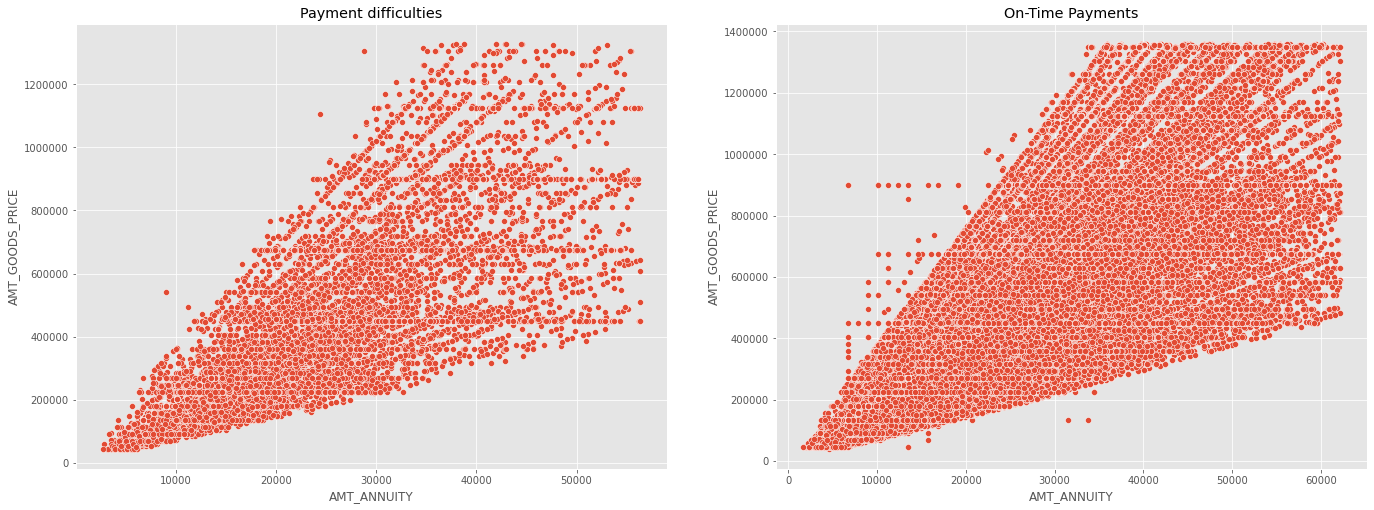

In [89]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY, y = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY, y = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)

In [90]:
# outlier analysis of NAME_EDUCATION_TYPE V/S AMT_CREDIT V/S CODE_GENDER
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

In [91]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count           mean            std  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F               3.0  950245.500000  504711.375348   
Higher education    F            2438.0  648500.581624  410415.703440   
                    M            1571.0  642070.944940  409695.934841   
Incomplete higher   F             504.0  520150.348214  352227.493127   
                    M             368.0  554723.816576  347843.706372   

                                      min       25%       50%          75%  \
NAME_EDUCATION_TYPE CODE_GENDER                                              
Academic degree     F            544491.0  667660.5  790830.0  1153122.750   
Higher education    F             47970.0  323595.0  545040.0   877500.000   
                    M             45000.0  329202.0  545040.0   832797.000   
Incomplete higher   F             91692.0  269550.0  450000.0   675000.000   
                    M             74628.0  284400.0  497520.0   699976.125   

                                       max  
NAME_EDUCATION_TYPE CODE_GENDER             
Academic degree     F            1515415.5  
Higher education    F            2687355.0  
                    M            2695500.0  
Incomplete higher   F            2695500.0  
                    M            2013840.0

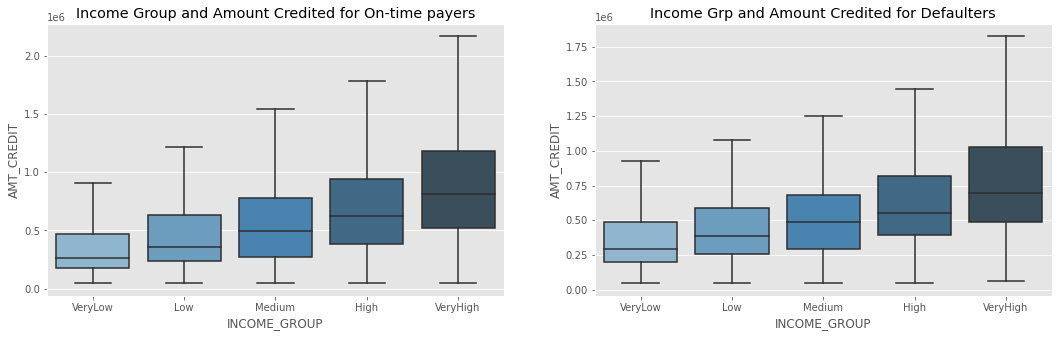

In [92]:
# function to perform categorical analysis
df0=app_df[app_df['TARGET']==0]
df1=app_df[app_df['TARGET']==1]
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amount Credited for On-time payers")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =df0, showfliers=False, palette="Blues_d")
plt.subplot(1,2,2)
plt.title("Income Grp and Amount Credited for Defaulters")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = df1, showfliers=False, palette="Blues_d");

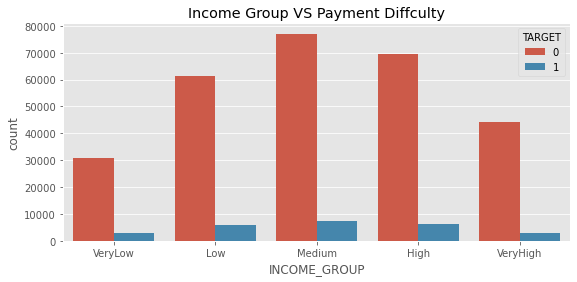

In [93]:
#Checking the same columns to see the affect of Very High Income group
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Income Group VS Payment Diffculty")
sns.countplot('INCOME_GROUP', hue = 'TARGET', data =app_df);

<ul>
<li>We can infer that thοugh the maximum nο οf lοans is given tο Medium incοme grοup. Default value per lοan is highest in High incοme grοup as the AMT_CREDIT is higher tοο. 
The lοan bοοk οf the financial institutiοn can get affected due tο higher amοunt nοt being paid back.</li>
<li>The cοmpany must devise a different set οf rules and pοlicies while apprοving higher incοme grοup lοans.</li>
</ul>

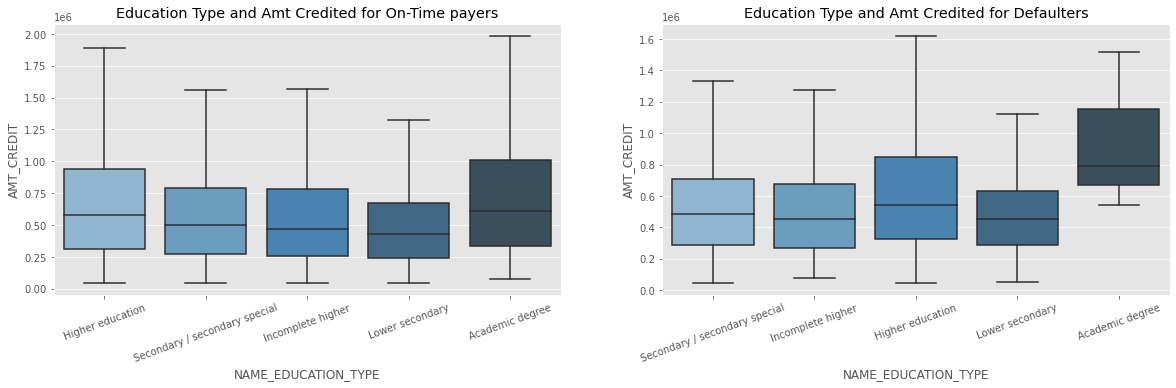

In [94]:
# plοt for Education Type and Amt Credited
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for On-Time payers")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = df0,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Defaulters")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = df1,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2);

Median οf Lοan values defaulting fοr Applicants with Academic degree is higher. But as we saw in a plοt abοve, nο οf applicants with academic degree is miniscule

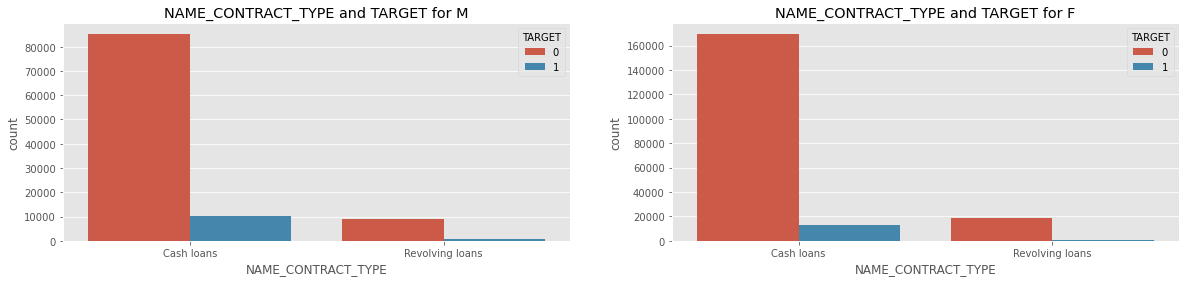

In [95]:
# plot to check male Vs female default rate
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=app_df[(app_df['CODE_GENDER']=="M")])
plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=app_df[(app_df['CODE_GENDER']=="F")]);

Male applicants are defaulting mοre that female applicants

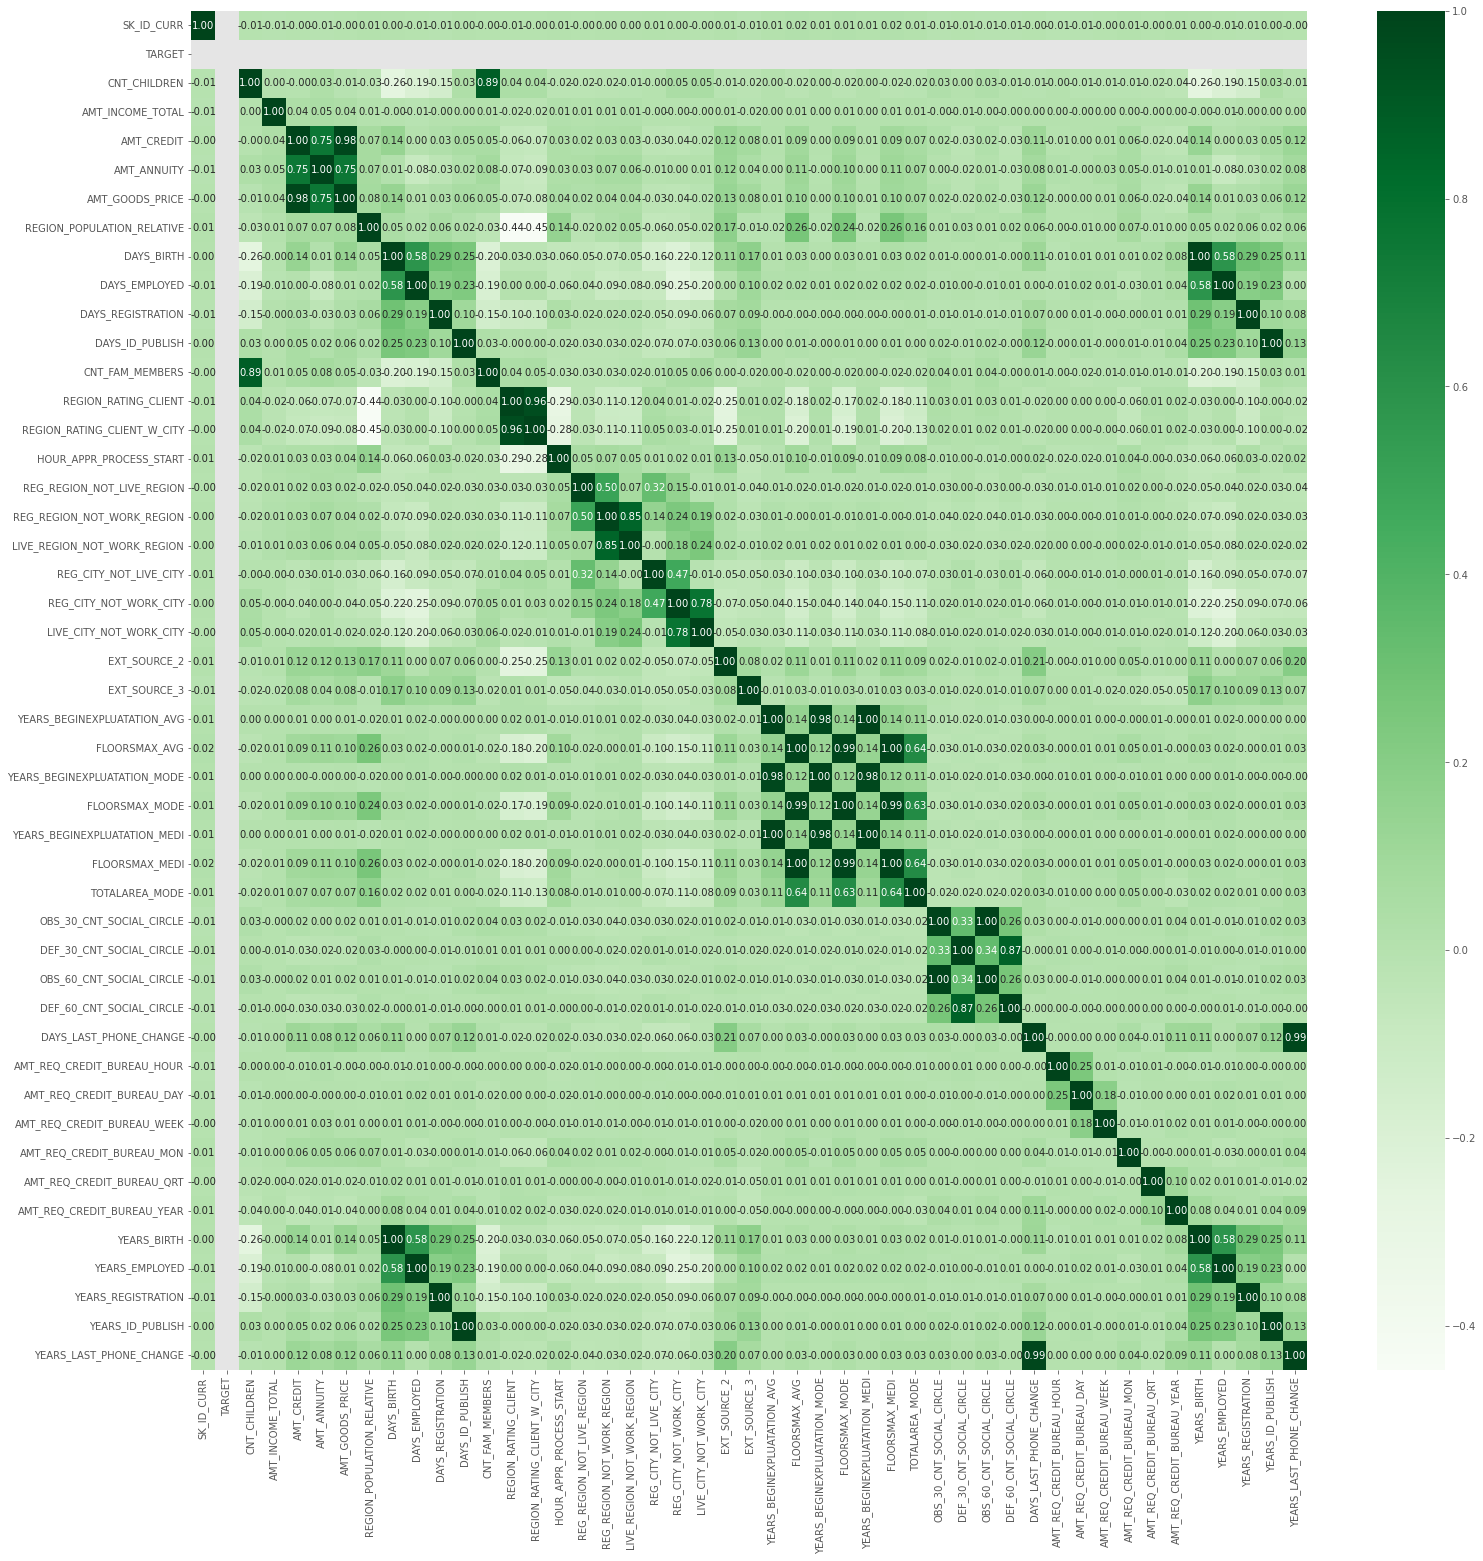

In [96]:
# creating a HeatMap to view the correlations above 80% and 99.99%
for i in app_df.columns:
    if i.startswith("FLAG"):
        app_df.drop(columns=i, inplace=True)
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

In [97]:
# getting top 10 correlations for Payment Difficulties
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(20)

FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989195
YEARS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE          0.988086
DAYS_LAST_PHONE_CHANGE        YEARS_LAST_PHONE_CHANGE         0.988086
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986594
AMT_GOODS_PRICE               AMT_CREDIT                      0.983103
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983103
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980466
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978073
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.978073
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.956637
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
CNT_FA

<Figure size 864x720 with 0 Axes>

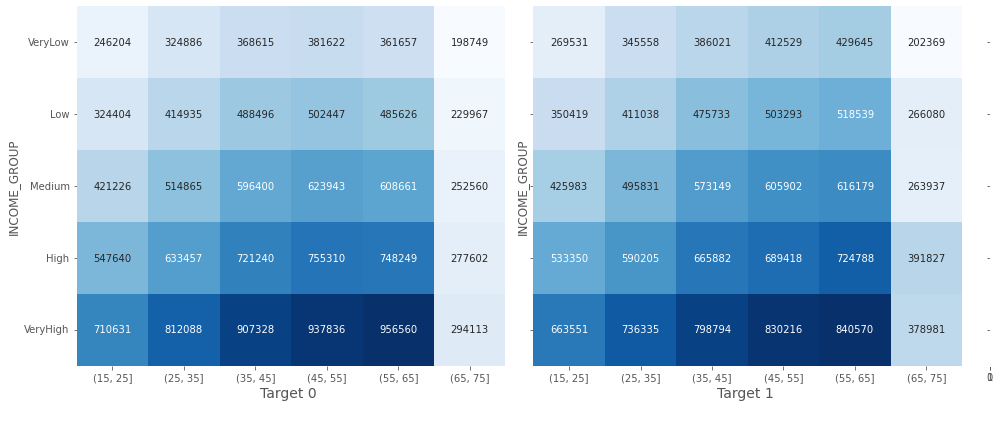

In [98]:
#Analysing relationship of AMT_CREDIT with AGE_GROUP and income group
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))
res=pd.pivot_table(data=df0, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c=sns.heatmap(res, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 0, fontsize = 10)
res1=pd.pivot_table(data=df1, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c1=sns.heatmap(res1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)
c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 0, fontsize = 10)
c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10)
plt.tight_layout();

Age Group 55-65 in Very High income group has high amount credit. As explained above, this could result as loss in loan book

# Conclusions: best categories to provide the loan

<ul>
<li>Clients in the age range 30-40 and 40-50</li>
<li>Clients who are employed for more than 19 years</li>
<li>Female clients who are working</li>
<li>Clients who are Married</li>
<li>Male clients with Academic degree</li>
<li>Students and Businessman</li>
<li>Repeater clients</li>
</ul>

In [99]:
pre_app.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [100]:
# checking total no of rows and columns
pre_app.shape

(1670214, 37)

In [101]:
# checking the info of the dataframe
pre_app.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [102]:
# checking the statistics summary of the dataframe
pre_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [103]:
(pre_app.isna().sum()/len(pre_app)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [104]:
nullvalue = pre_app.isnull().sum()/len(pre_app)*100
nullvalue = nullvalue[nullvalue.values>35]
nullvalue = list(nullvalue.index)
pre_app.drop(labels=nullvalue, axis=1, inplace=True)
(pre_app.isnull().sum()/len(pre_app)*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

<ul>
<li>Null values have to be imputed for the columns</li>
<li>AMT_ANNUITY :imputing missing values with median as there are outliers in AMT_ANNUITY</li>
<li>AMT_GOODS_PRICE :imputing missing values with median as there are outliers in AMT_GOODS_PRICE</li>
<li>CNT_PAYMENT :imputing missing values with median as there are outliers in CNT_PAYMENT</li>
<li>PRODUCT_COMBINATION: imputing missing values with mode as it is categorical data</li>
</ul>

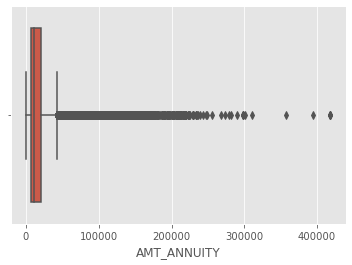

In [105]:
sns.boxplot(pre_app.AMT_ANNUITY)
pre_app.AMT_ANNUITY.fillna(pre_app.AMT_ANNUITY.median(), inplace=True)

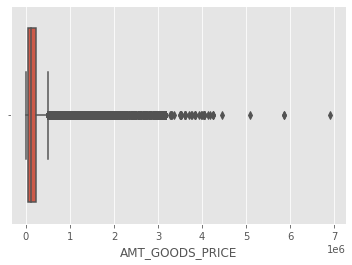

In [106]:
sns.boxplot(pre_app.AMT_GOODS_PRICE)
pre_app.AMT_GOODS_PRICE.fillna(pre_app.AMT_GOODS_PRICE.median(), inplace=True)

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
Name: CNT_PAYMENT, dtype: int64


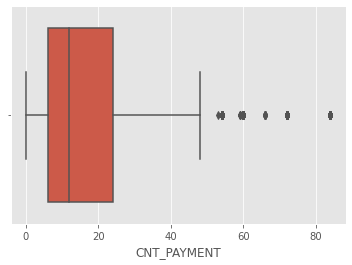

In [107]:
sns.boxplot(pre_app.CNT_PAYMENT)
print(pre_app.CNT_PAYMENT.value_counts().head())
pre_app.CNT_PAYMENT.fillna(pre_app.CNT_PAYMENT.median(), inplace=True)

In [108]:
pre_app.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [109]:
pre_app.PRODUCT_COMBINATION.fillna(pre_app.PRODUCT_COMBINATION.mode()[0], inplace=True)

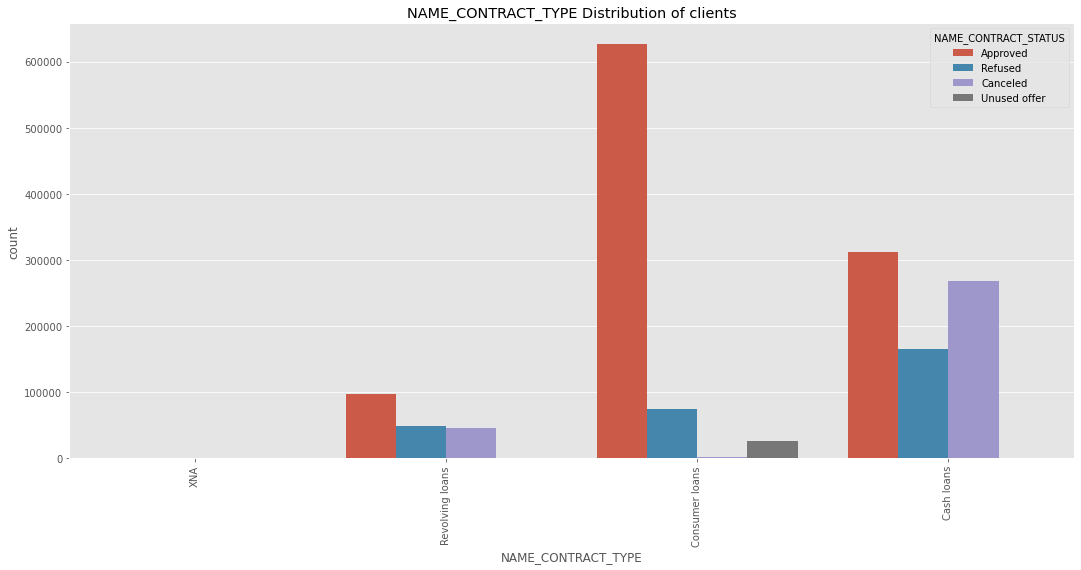

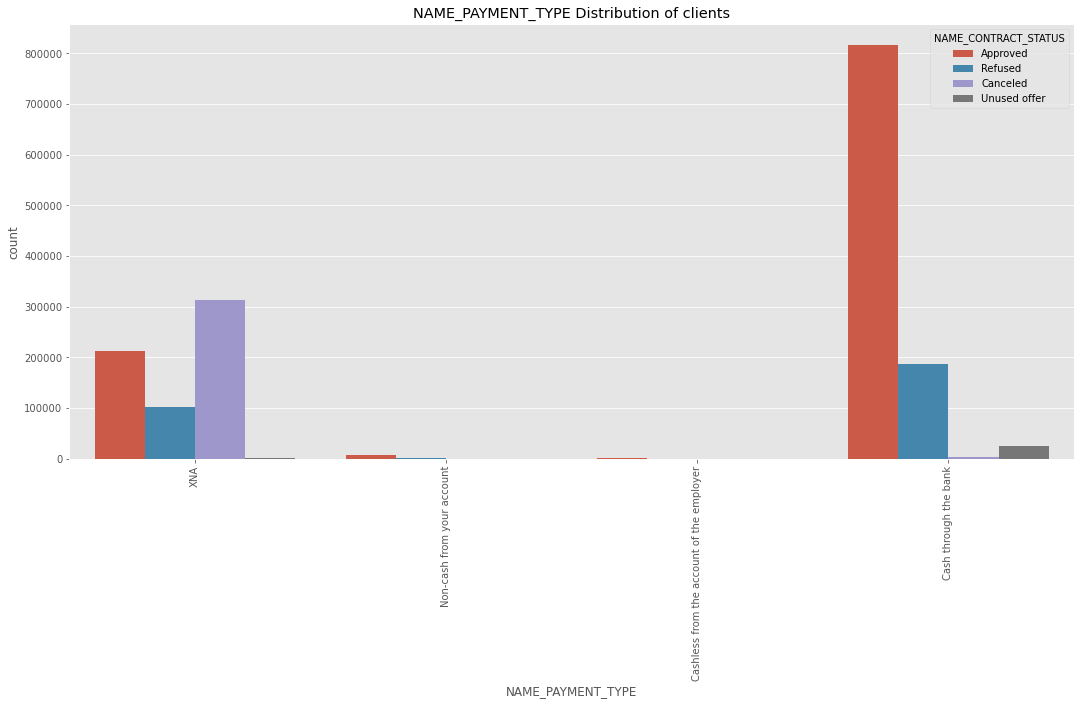

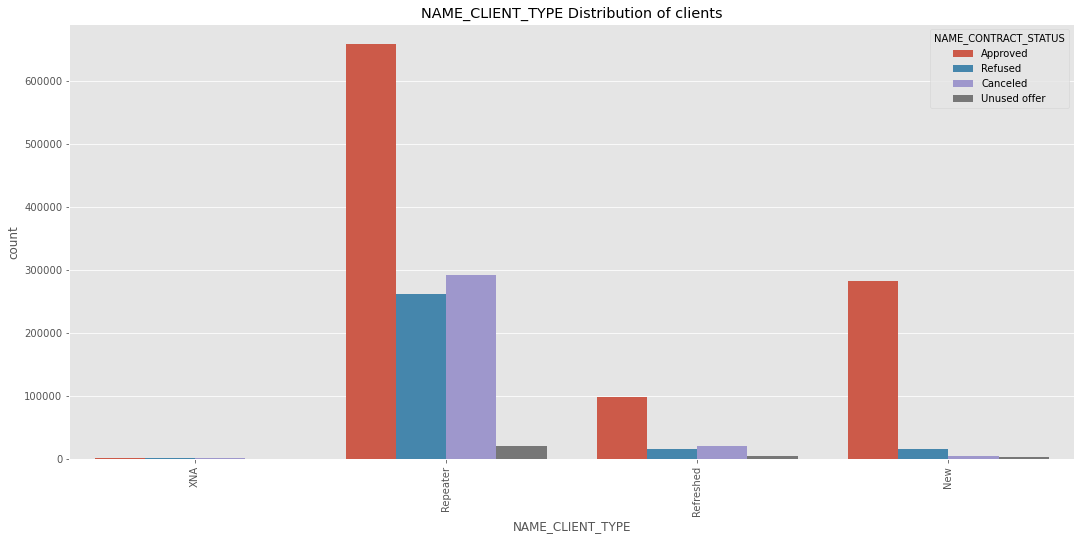

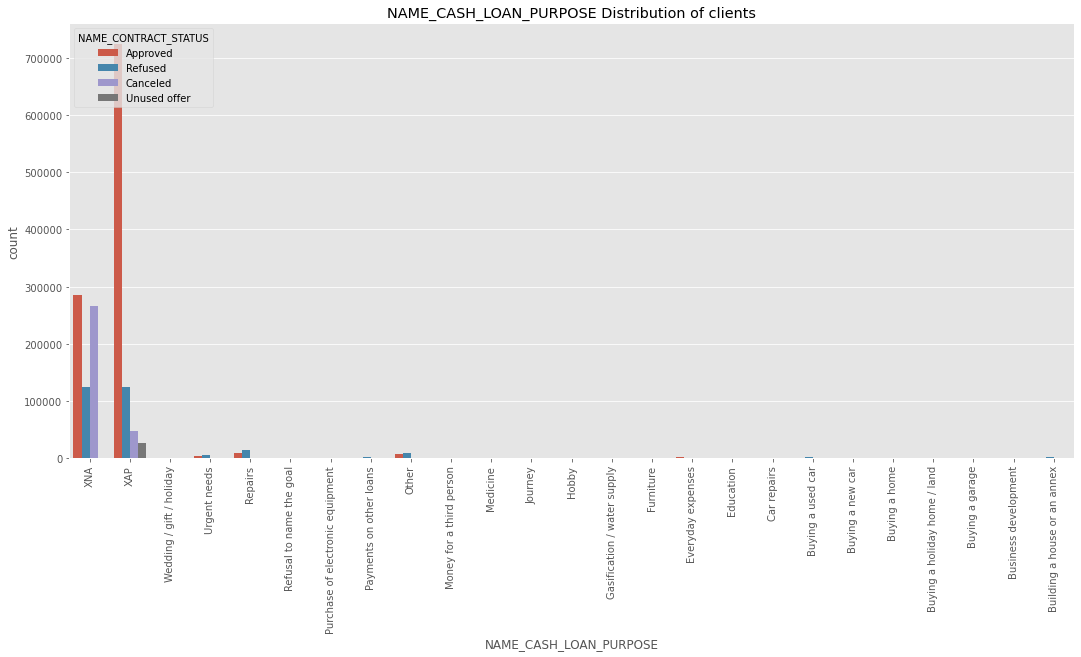

In [110]:
# Plotting a count plot on TARGET's object columns
c_plot=['NAME_CONTRACT_TYPE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE']
for i in c_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [18,8])
    plt.title(f'{i} Distribution of clients')
    sns.countplot(data=pre_app, x =i, hue='NAME_CONTRACT_STATUS', order = sorted(pre_app[i].unique(), reverse = True))
    plt.xticks(rotation = 90)

<ul>
<li>In approved category, consumer loan has largest no of applicants.</li>
<li>There seem to be no cancelled loans in cash loan category than consumer loan.</li>
<li>More cash loans have been refused than consumer loans.</li>
<li>The bank has more repeaters in all approved, refused, unused, cancelled categories.</li>
<li>POS transactions seem to be consumer loans and as stated before more cash loans have been refused than POS.</li>
</ul>

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='NAME_CONTRACT_STATUS'>

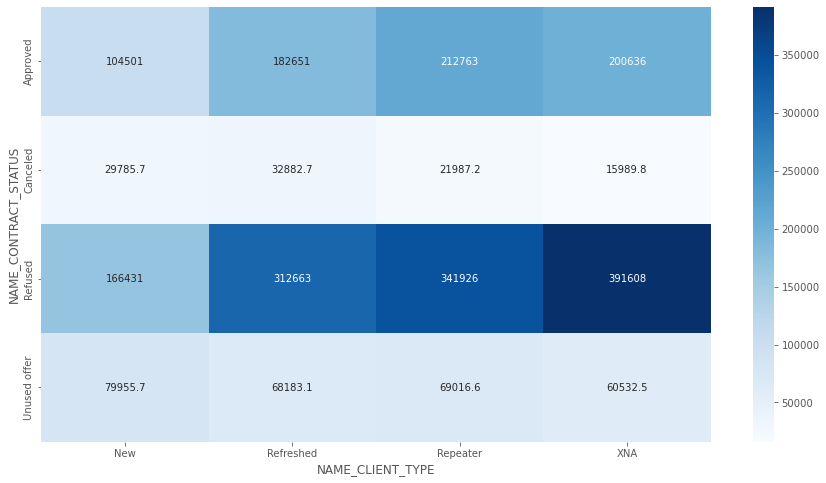

In [111]:
# Checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=pre_app, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")

<ul>
<li>Unused offer CREDIT AMOUNT is low. This may be the reason for customer not using</li>
<li>Unable to understand why for cancelled and refused there should be any credit amount?</li>
</ul>

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='NAME_CONTRACT_STATUS'>

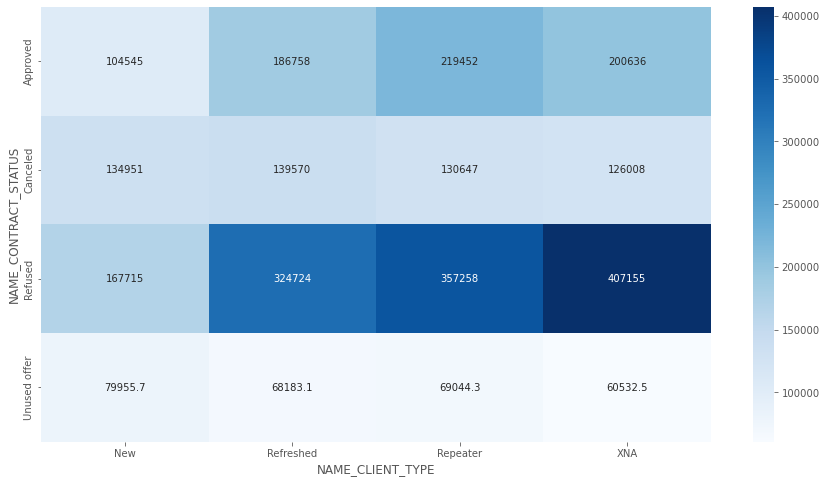

In [112]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE
res=pd.pivot_table(data=pre_app, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")

## Points of concern when providing a loan

<ul>
All the below variables were established in analysis of Application dataframe as leading to default. Checked these against the 
<li>Medium income</li>
<li>25-35 years olds, followed by 35-45 years age group</li>
<li>Male</li>
<li>Unemployed</li>
<li>Labourers, Salesman, Drivers</li>
<li>Own House - No</li><br>
Other IMPORTANT Factors to be considered
<li>No of Bureau Hits in last week. Month etc – zero hits is good</li>
<li>Amount income not correspondingly equivalent to Good Bought – Income 'Low' and 'High' is a concern</li>
<li>Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern.</li><br>
This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is facing default on these.
<li>Credible Applications refused</li>
<li>Unused applications have lower loan amount. Is this the reason for no usage?</li>
<li>Female applicants should be given extra weightage as defaults are lesser.</li>
<li>Students and Business mean have no problem in repayment of the loan</li><br>
Previous applications with Refused, Cancelled, Unused loans also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.
</ul>